In [29]:


l = [{"metadata":{"id":8503,"definendum_label":"#personalData","dataset":"EurLex","document_id":"32016R0794.xml","frbr_work":"/akn/eu/act/regulation/2016-05-11/794/!main","frbr_expression":"/akn/eu/act/regulation/2016-05-11/794/eng@/!main"},"definition_text":"personal data: means any information relating to a data subject;","timeline":[{"date":"2022-06-28","definition":"(h) \" personal data \" means any information relating to a data subject;"}]},{"metadata":{"id":3817,"definendum_label":"#personalData","dataset":"EurLex","document_id":"32017R0218.xml","frbr_work":"/akn/eu/act/regulation/2017-02-06/218/!main","frbr_expression":"/akn/eu/act/regulation/2017-02-06/218/eng@/!main"},"definition_text":"personal data: means any information relating to an identified or identifiable natural person as defined in Article 2(a) of Regulation (EC) No 45/2001","timeline":[{"date":"2017-02-06","definition":"(m) \" personal data \" means any information relating to an identified or identifiable natural person as defined in Article 2(a) of Regulation (EC) No 45/2001"}]},{"metadata":{"id":2434,"definendum_label":"#personalData","dataset":"EurLex","document_id":"32018R1862.xml","frbr_work":"/akn/eu/act/regulation/2018-11-28/1862/!main","frbr_expression":"/akn/eu/act/regulation/2018-11-28/1862/eng@/!main"},"definition_text":"personal data: means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679","timeline":[{"date":"2019-06-11","definition":"(4) \" personal data \" means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679"}]},{"metadata":{"id":9194,"definendum_label":"#personalData","dataset":"EurLex","document_id":"32018R1861.xml","frbr_work":"/akn/eu/act/regulation/2018-11-28/1861/!main","frbr_expression":"/akn/eu/act/regulation/2018-11-28/1861/eng@/!main"},"definition_text":"personal data: means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679","timeline":[{"date":"2019-06-11","definition":"(5) \" personal data \" means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679"}]}]
l2 = [{'metadata': {'id': 2434, 'definendum_label': '#personalData', 'dataset': 'EurLex', 'document_id': '32018R1862.xml', 'frbr_work': '/akn/eu/act/regulation/2018-11-28/1862/!main', 'frbr_expression': '/akn/eu/act/regulation/2018-11-28/1862/eng@/!main'}, 'definition_text': 'personal data: means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679', 'timeline': [{'date': '2019-06-11', 'definition': '(4) " personal data " means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679'}]}, {'metadata': {'id': 9194, 'definendum_label': '#personalData', 'dataset': 'EurLex', 'document_id': '32018R1861.xml', 'frbr_work': '/akn/eu/act/regulation/2018-11-28/1861/!main', 'frbr_expression': '/akn/eu/act/regulation/2018-11-28/1861/eng@/!main'}, 'definition_text': 'personal data: means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679', 'timeline': [{'date': '2019-06-11', 'definition': '(5) " personal data " means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679'}]}]
from LegalDefAgent.src.utils import parse_date_filters, parse_date
import datetime


def filter_documents_by_date(documents, date_filters):
    """
    Filter legal definitions based on their timeline dates and given date filters.
    
    Args:
        documents: List of document dictionaries containing timeline information
        date_filters: Tuple of (from_date, to_date) as strings
        
    Returns:
        List of filtered documents that fall within the date range
    """
    parsed_filters = parse_date_filters(date_filters)
    
    # If single date filter
    if isinstance(parsed_filters, datetime.date):
        target_date = parsed_filters
        return [
            doc for doc in documents
            if any(
                parse_date(entry['date']) == target_date
                for entry in doc['timeline']
            )
        ]
    
    # If date range filter
    from_date, to_date = parsed_filters
    return [
        doc for doc in documents
        if any(
            from_date <= parse_date(entry['date']) <= to_date
            for entry in doc['timeline']
        )
    ]



filter_documents_by_date(l, ("2018-01-01","2018-12-31"))

[x['definition_text'] for x in l]

['personal data: means any information relating to a data subject;',
 'personal data: means any information relating to an identified or identifiable natural person as defined in Article 2(a) of Regulation (EC) No 45/2001',
 'personal data: means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679',
 'personal data: means personal data as defined in point 1 of Article 4 of Regulation (EU) 2016/679']

In [21]:
for z in l:
    print([x['date'] for x in z['timeline']])

['2022-06-28']
['2017-02-06']
['2019-06-11']
['2019-06-11']


In [10]:
from LegalDefAgent.src.agent import definitions_agent


for chunk in definitions_agent.stream(
    {"messages": [("user", "what's the definition of dog?")]},
    # provide user ID in the config
    {"configurable": {"user_id": "1", "thread_id": "1"}},
    stream_mode="values",
):
    print(chunk['messages'][-1].pretty_print())
    print("\n")


================================ Human Message =================================

what's the definition of dog?
None


================================== Ai Message ==================================
Tool Calls:
  definition_search (call_zTAKPdrYhE0neCXBnNprGV1f)
 Call ID: call_zTAKPdrYhE0neCXBnNprGV1f
  Args:
    question: what's the definition of dog?
    definendum: dog
    legislation: None
    date_filters: None
None


================================= Tool Message =================================
Name: definition_search

Error: NotImplementedError('StructuredTool does not support sync invocation.')
 Please fix your mistakes.
None


================================== Ai Message ==================================
Tool Calls:
  definition_search (call_9IfN6qNCotGfXfNLdPTxhCMk)
 Call ID: call_9IfN6qNCotGfXfNLdPTxhCMk
  Args:
    question: what's the definition of dog?
    definendum: dog
    legislation: None
    date_filters: None
None


================================= Tool Messa

KeyboardInterrupt: 

In [3]:
all_states = []
for state in definitions_agent.get_state_history(config = {"configurable": {"thread_id": "1"}}
):
    print(state.values)
    all_states.append(state)
    print("--")

{'messages': [HumanMessage(content="what's 2+2?", additional_kwargs={}, response_metadata={}, id='dce40542-c0d5-4fda-8939-3ffbf86aea75'), AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_SEbglJvSIVW5oBxDfGhUyN8L', 'function': {'arguments': '{"state":{"messages":[{"content":"4","type":"ai"}]}}', 'name': 'middle'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c'}, id='run-fe0a3fef-a54e-4def-877b-0f3c3739decf-0', tool_calls=[{'name': 'middle', 'args': {'state': {'messages': [{'content': '4', 'type': 'ai'}]}}, 'id': 'call_SEbglJvSIVW5oBxDfGhUyN8L', 'type': 'tool_call'}])]}
--
{'messages': [HumanMessage(content="what's 2+2?", additional_kwargs={}, response_metadata={}, id='dce40542-c0d5-4fda-8939-3ffbf86aea75')]}
--
{'messages': []}
--


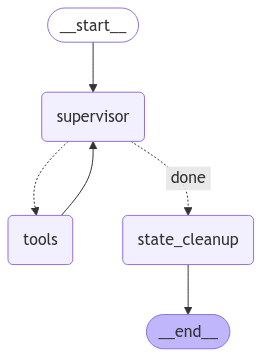

In [34]:
from LegalDefAgent.src.utils import draw_graph
from LegalDefAgent.src.agent import definitions_agent


draw_graph(definitions_agent)

In [1]:
from LegalDefAgent.src.retriever import vector_store
from LegalDefAgent.src.settings import settings

existdb_settings = settings.EXIST_CONFIG

### Utils

### Setup retriever

In [22]:
retriever = vector_store.setup_retriever()
res = retriever.invoke('small and medium sized enterprise')
res

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

[Document(metadata={'id': 2275, 'definendum_label': '#smallAndMedium-SizedEnterprise', 'dataset': 'EurLex', 'document_id': '32021R0523.xml', 'frbr_work': '/akn/eu/act/regulation/2021-03-24/523/!main', 'frbr_expression': '/akn/eu/act/regulation/2021-03-24/523/eng@/!main'}, page_content='small and medium-sized enterprise: small or medium-sized enterprise within the meaning of the Annex to Commission Recommendation 2003/361/ECor "SME" Commission Recommendation 2003/361/EC of 6 May 2003 concerning the definition of micro, small and medium-sized enterprises ( OJ L 124, 20.5.2003, p. 36 ). ;'),
 Document(metadata={'id': 8108, 'definendum_label': '#smallOrMedium-SizedEnterprise', 'dataset': 'EurLex', 'document_id': '32021R0694.xml', 'frbr_work': '/akn/eu/act/regulation/2021-04-29/694/!main', 'frbr_expression': '/akn/eu/act/regulation/2021-04-29/694/eng@/!main'}, page_content='small or medium-sized enterprise: small or medium-sized enterprise as defined in Article 2 of the Annex to Commission 

In [19]:
from pymilvus import connections


vector_store.connect_to_milvus(settings.MILVUSDB_URI)

In [20]:
collection = vector_store.get_collection()
collection

<Collection>:
-------------
<name>: Definitions
<description>: Definitions embeddings
<schema>: {'auto_id': False, 'description': 'Definitions embeddings', 'fields': [{'name': 'id', 'description': '', 'type': <DataType.INT64: 5>, 'is_primary': True, 'auto_id': False}, {'name': 'definition_text', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 5000}}, {'name': 'definendum_label', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 256}}, {'name': 'dataset', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 10}}, {'name': 'document_id', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 40}}, {'name': 'frbr_work', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 120}}, {'name': 'frbr_expression', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 120}}, {'name': 'sparse_vector', 'description': '', 'type': <DataType.SPARSE_FLOAT_VECTOR:

In [21]:
collection.query(expr="definendum_label in ['#SME']")

data: ["{'id': 2403}", "{'id': 4041}", "{'id': 4240}", "{'id': 5434}", "{'id': 7829}"] 

In [3]:
l = [{"metadata":{"id":2772,"definendum_label":"#dog","dataset":"EurLex","document_id":"32019R2035.xml","frbr_work":"/akn/eu/act/regulation/2019-06-28/2035/!main","frbr_expression":"/akn/eu/act/regulation/2019-06-28/2035/eng@/!main"},"definition_text":"dog: means a kept animal of the Canis lupus species;"},{"metadata":{"id":5008,"definendum_label":"#dog","dataset":"EurLex","document_id":"32020R0689.xml","frbr_work":"/akn/eu/act/regulation/2019-12-17/689/!main","frbr_expression":"/akn/eu/act/regulation/2019-12-17/689/eng@/!main"},"definition_text":"dog: means a kept animal of the Canis lupus species;"},{"metadata":{"id":8263,"definendum_label":"#dog","dataset":"EurLex","document_id":"32020R0688.xml","frbr_work":"/akn/eu/act/regulation/2019-12-17/688/!main","frbr_expression":"/akn/eu/act/regulation/2019-12-17/688/eng@/!main"},"definition_text":"dog: means a kept animal of the Canis lupus species;"},{"metadata":{"id":4556,"definendum_label":"#documentaryCheck","dataset":"EurLex","document_id":"32013R0576.xml","frbr_work":"/akn/eu/act/regulation/2013-06-12/576/!main","frbr_expression":"/akn/eu/act/regulation/2013-06-12/576/eng@/!main"},"definition_text":"documentary check: means verification of the identification document accompanying the pet animal;"},{"metadata":{"id":1786,"definendum_label":"#animals","dataset":"EurLex","document_id":"32016R0429.xml","frbr_work":"/akn/eu/act/regulation/2016-03-09/429/!main","frbr_expression":"/akn/eu/act/regulation/2016-03-09/429/eng@/!main"},"definition_text":"animals: means vertebrate and invertebrate animals;"},{"metadata":{"id":16498,"definendum_label":"#animaleDaPelliccia","dataset":"PDL","document_id":"18PDL0002590_PD.xml","frbr_work":"/akn/it/bill/propostaDiLegge/2018-03-23/177/!main","frbr_expression":"/akn/it/bill/propostaDiLegge/2018-03-23/177/ita@/!main"},"definition_text":"animale da pelliccia: le seguenti specie di animali: cane procione (Nyctereutes procyonoides), capra della Mongolia (Ovis Steatopyga), castorino (detto nutria - Myocastor coypus), castoro (Castor canadensis), cincillà (Chinchilla laniger), coniglio (detto lapin - Oryctolagus cuniculus), coyote (Canis latrans), donnola (Mustela nivalis), ermellino (Mustela erminea), foca (Phocidae), gatto leopardo (Prionailurus bengalensis), karakul (detto astrakhan o agnello persiano - Ovis aries platyura), lince (Lynx), lontra (Lutra canadensis), marmotta (Marmota marmota), martora (Martes martes), moffetta (detta skunk - Mephitis mephitis), ocelot (Felis pardalis), ondatra (detto topo muschiato - Ondatra zybethica), opossum (Didelphis marsupialis), procione (Procyon lotor), puzzola (Mustela putorius), scoiattolo (Sciurus carolinensis), tasso (Meles meles), visone (Mustela vison o Neovison vison), volpe (Vulpes vulpes), zibellino (Martes zibellina), coccodrillo (Crocodylia), pitone (Python) e varano (Varanus);"},{"metadata":{"id":4549,"definendum_label":"#petAnimal","dataset":"EurLex","document_id":"32013R0576.xml","frbr_work":"/akn/eu/act/regulation/2013-06-12/576/!main","frbr_expression":"/akn/eu/act/regulation/2013-06-12/576/eng@/!main"},"definition_text":"pet animal: means an animal of a species listed in Annex I accompanying its owner or an authorised person during non-commercial movement, and which remains for the duration of such non-commercial movement under the responsibility of the owner or the authorised person;"},{"metadata":{"id":13223,"definendum_label":"#distress","dataset":"Normattiva","document_id":"20140314_14G00036_VIGENZA_20220301.xml","frbr_work":"/akn/it/act/decretoLegislativo/stato/2014-03-04/26/!main","frbr_expression":"/akn/it/act/decretoLegislativo/stato/2014-03-04/26/ita@2022-03-01/!main"},"definition_text":"distress: condizione di non adattamento dell'animale a stimoli stressanti;"},{"metadata":{"id":11255,"definendum_label":"#petAnimal","dataset":"EurLex","document_id":"32019R2122.xml","frbr_work":"/akn/eu/act/regulation/2019-10-10/2122/!main","frbr_expression":"/akn/eu/act/regulation/2019-10-10/2122/eng@/!main"},"definition_text":"pet animal: means pet animal as defined in point (11) of Article 4 of Regulation (EU) 2016/429 of the European Parliament and of the Council Regulation (EU) 2016/429 of the European Parliament and of the Council of 9 March 2016 on transmissible animal diseases and amending and repealing certain acts in the area of animal health ( \"Animal Health Law) ( OJ L 84, 31.3.2016, p. 1 ). ;"},{"metadata":{"id":16300,"definendum_label":"#animaleDaPelliccia","dataset":"PDL","document_id":"18PDL0001950_PD.xml","frbr_work":"/akn/it/bill/propostaDiLegge/2018-03-23/99/!main","frbr_expression":"/akn/it/bill/propostaDiLegge/2018-03-23/99/ita@/!main"},"definition_text":"animale da pelliccia: le seguenti specie di animali: Cane procione (Nyctereutes procyonoides), Capra della Mongolia (Ovis Steatopyga), Castorino o Nutria (Myocastor coypus), Castoro (Castor canadensis), Cincillà (Chinchilla laniger), Coniglio o Lapin (Oryctolagus cuniculus), Coyote (Canis latrans), Donnola (Mustela nivalis), Ermellino (Mustela erminea), Foca (Phocidae), Gatto leopardo (Prionailurus bengalensis), Karakul o Astrakhan o Agnello persiano (Ovis aries platyura), Lince (Lynx), Lontra (Lutra canadensis), Marmotta (Marmota marmota), Martora (Martes martes), Moffetta o Skunk (Mephitis mephitis)), Ocelot (Felis pardalis), Ondatra o Topo muschiato (Ondatra zybethica), Opossum (Didelphis marsupialis), Procione (Procyon lotor), Puzzola (Mustela putorius), Scoiattolo (Sciurus carolinensis), Tasso (Meles meles), Visone (Mustela visori), Volpe (Vulpes vulpes), Zibellino (Martes zibellina), nonché Coccodrillo (Crocodylia), Pitone (Python), Varano (Varanus);"}]

[{'id': x['metadata']['id'], 'definition': x['definition_text']} for x in l]

[{'id': 2772,
  'definition': 'dog: means a kept animal of the Canis lupus species;'},
 {'id': 5008,
  'definition': 'dog: means a kept animal of the Canis lupus species;'},
 {'id': 8263,
  'definition': 'dog: means a kept animal of the Canis lupus species;'},
 {'id': 4556,
  'definition': 'documentary check: means verification of the identification document accompanying the pet animal;'},
 {'id': 1786,
  'definition': 'animals: means vertebrate and invertebrate animals;'},
 {'id': 16498,
  'definition': 'animale da pelliccia: le seguenti specie di animali: cane procione (Nyctereutes procyonoides), capra della Mongolia (Ovis Steatopyga), castorino (detto nutria - Myocastor coypus), castoro (Castor canadensis), cincillà (Chinchilla laniger), coniglio (detto lapin - Oryctolagus cuniculus), coyote (Canis latrans), donnola (Mustela nivalis), ermellino (Mustela erminea), foca (Phocidae), gatto leopardo (Prionailurus bengalensis), karakul (detto astrakhan o agnello persiano - Ovis aries plat

In [1]:
from LegalDefAgent.src.settings import settings

settings.AVAILABLE_MODELS

{<AnthropicModelName.HAIKU_35: 'claude-3-5-haiku-20241022'>,
 <AnthropicModelName.SONNET_35: 'claude-3-5-sonnet-20241022'>,
 <DeepSeekModelName.DEEPSEEK_CHAT: 'deepseek-chat'>,
 <DeepSeekModelName.DEEPSEEK_R1: 'deepseek-reasoner'>,
 <GoogleModelName.GEMINI_15_FLASH: 'gemini-1.5-flash'>,
 <GoogleModelName.GEMINI_15_FLASH_8B: 'gemini-1.5-flash-8b'>,
 <GoogleModelName.GEMINI_15_PRO: 'gemini-1.5-pro'>,
 <OpenAIModelName.GPT_4O: 'gpt-4o'>,
 <OpenAIModelName.GPT_4O_MINI: 'gpt-4o-mini'>,
 <GroqModelName.LLAMA_31_8B: 'groq-llama-3.1-8b-instant'>,
 <GroqModelName.LLAMA_33_70B: 'groq-llama-3.3-70b-versatile'>,
 <MistralModelName.NEMO_12B: 'open-mistral-nemo'>}

In [30]:
import httpx
response = httpx.get(
    f"http://localhost/info",
)

response

ConnectError: [Errno 111] Connection refused

In [10]:
from LegalDefAgent.src.utils import docs_list_to_json_list


docs_list_to_json_list(res)

[{'metadata': {'id': 2275,
   'definendum_label': '#smallAndMedium-SizedEnterprise',
   'dataset': 'EurLex',
   'document_id': '32021R0523.xml',
   'frbr_work': '/akn/eu/act/regulation/2021-03-24/523/!main',
   'frbr_expression': '/akn/eu/act/regulation/2021-03-24/523/eng@/!main'},
  'definition_text': 'small and medium-sized enterprise: small or medium-sized enterprise within the meaning of the Annex to Commission Recommendation 2003/361/ECor "SME" Commission Recommendation 2003/361/EC of 6 May 2003 concerning the definition of micro, small and medium-sized enterprises ( OJ L 124, 20.5.2003, p. 36 ). ;'},
 {'metadata': {'id': 8108,
   'definendum_label': '#smallOrMedium-SizedEnterprise',
   'dataset': 'EurLex',
   'document_id': '32021R0694.xml',
   'frbr_work': '/akn/eu/act/regulation/2021-04-29/694/!main',
   'frbr_expression': '/akn/eu/act/regulation/2021-04-29/694/eng@/!main'},
  'definition_text': 'small or medium-sized enterprise: small or medium-sized enterprise as defined in A

In [1]:
retriever = vectorstore.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={
        'score_threshold': 0.7,
        'k': 10,
        },
)

NameError: name 'vectorstore' is not defined

In [11]:
retriever.invoke('quale è la definizione di gatto?', expr="dataset == 'Normattiva'")

[Document(metadata={'dataset': 'Normattiva', 'def_n': '#def_12', 'definendum_label': '#lottoDiProduzione', 'document_id': '20111206_011G0243_ORIGINALE.xml', 'frbr_expression': '/akn/it/act/decretoLegislativo/stato/2011-10-27/202/ita@2011-12-07/!main', 'frbr_work': '/akn/it/act/decretoLegislativo/stato/2011-10-27/202/!main', 'id': 11642, 'sparse_vector': {12: 0.10329372435808182, 23: 0.11039234697818756, 45: 0.16426877677440643, 74: 0.027549363672733307, 95: 0.0039486363530159, 117: 0.0025216788053512573, 118: 0.0032414644956588745, 128: 0.032060712575912476, 158: 0.03596837818622589, 171: 0.12179641425609589, 185: 0.0072914958000183105, 188: 0.19567488133907318, 522: 0.07515468448400497, 986: 0.01406523585319519, 1399: 0.1050686240196228, 3459: 0.06406818330287933, 5739: 0.22165526449680328, 5915: 0.2397218495607376, 10798: 0.10271574556827545, 11972: 0.008629076182842255, 13777: 0.049982041120529175, 21203: 0.13296334445476532, 35183: 0.1514940857887268, 37860: 0.11117416620254517, 38

In [12]:
vectorstore.similarity_search_with_relevance_scores(query="what's the definition of pollution?",k=7,score_threshold=0.7, expr="dataset == 'Normattiva'")

[(Document(metadata={'dataset': 'Normattiva', 'def_n': '#def_2', 'definendum_label': '#inquinante', 'document_id': '20100915_010G0177_VIGENZA_20180717.xml', 'frbr_expression': '/akn/it/act/decretoLegislativo/stato/2010-08-13/155/ita@2018-07-17/!main', 'frbr_work': '/akn/it/act/decretoLegislativo/stato/2010-08-13/155/!main', 'id': 13000, 'sparse_vector': {12: 0.1429562270641327, 23: 0.19519057869911194, 25: 0.020765796303749084, 36: 0.04958652704954147, 74: 0.10914065688848495, 123: 0.13886600732803345, 290: 0.013084381818771362, 788: 0.08282901346683502, 1718: 0.040148213505744934, 2733: 0.28420454263687134, 6232: 0.19255824387073517, 7863: 0.05157710611820221, 8121: 0.1340077668428421, 10076: 0.08425828814506531, 14019: 0.18237358331680298, 17542: 0.10249418020248413, 28272: 0.31996843218803406, 37331: 0.12138868868350983, 49498: 0.15872368216514587, 56916: 0.14360542595386505, 57293: 0.15196901559829712, 76160: 0.15768659114837646, 91908: 0.12092244625091553, 137482: 0.08774228394031

In [13]:
query = "what's the definition of water pollution?"
query = "quale è la definizione di inquinamento?"
query = "what's the definition of pollution?"
query = "what's the definition of dog?"

retrieved_defs = retriever.invoke(query)

print(len(retrieved_defs))
[d.page_content for d in retrieved_defs]
retrieved_defs

10


[Document(metadata={'dataset': 'EurLex', 'def_n': '#def_29', 'definendum_label': '#dog', 'document_id': '32020R0688.xml', 'frbr_expression': '/akn/eu/act/regulation/2019-12-17/688/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2019-12-17/688/!main', 'id': 8263, 'sparse_vector': {10: 0.1022593230009079, 12: 0.1716887205839157, 70: 0.0054992325603961945, 74: 0.10426440834999084, 111: 0.07214429974555969, 164: 0.17119206488132477, 223: 0.18796302378177643, 4171: 0.18899379670619965, 10269: 0.3038153350353241, 26249: 0.23100817203521729, 26950: 0.19385629892349243, 61603: 0.19121502339839935, 93544: 0.22481609880924225, 114149: 0.14507295191287994}}, page_content='dog: means a kept animal of the Canis lupus species;'),
 Document(metadata={'dataset': 'EurLex', 'def_n': '#def_10', 'definendum_label': '#dog', 'document_id': '32020R0689.xml', 'frbr_expression': '/akn/eu/act/regulation/2019-12-17/689/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2019-12-17/689/!main', 'id': 5008, 'sparse

### Setup eXist handler

In [14]:
from typing import List, Optional, Any
from pyexistdb import db


class ExistDBHandler:
    """Handler for executing XQueries against an eXist-db instance."""
    
    def __init__(self, server_url: str, username: str, password: str):
        """
        Initialize connection to eXist-db.
        
        Args:
            server_url: Full URL to eXist-db server
            username: eXist-db username
            password: eXist-db password
        """
        self.db = db.ExistDB(server_url, username, password)
    
    def execute_query(self, query: str) -> List[str]:
        """
        Execute an XQuery and return all results.
        
        Args:
            query: XQuery string to execute
            
        Returns:
            List of results as strings
            
        Raises:
            Exception: If query execution fails
        """
        try:
            results = []
            query_result = self.db.executeQuery(query)
            hits = self.db.getHits(query_result)
            
            for i in range(hits):
                result = self.db.retrieve(query_result, i)
                results.append(result)
                
            return results
            
        except Exception as e:
            raise Exception(f"Query execution failed: {str(e)}")


EXISTDB_SERVER_URL = f"http://{existdb_settings.XDB_HOST}:{existdb_settings.XDB_PORT}/exist/"

handler = ExistDBHandler(
    server_url=EXISTDB_SERVER_URL,
    username=existdb_settings.XDB_USER,
    password=existdb_settings.XDB_PASSWORD
)

u2_handler = ExistDBHandler(
    server_url="http://u2.cirsfid.unibo.it:8080/exist/",
    username=None,
    password=None
)

ns = settings.DB_CONFIG.NAMESPACES

In [3]:
s = {
  "documents": [
    {
      "metadata": {
        "id": 5890,
        "definendum_label": "#nationalAdministrativeCompetitionAuthority",
        "dataset": "EurLex",
        "document_id": "32019L0001.xml",
        "frbr_work": "/akn/eu/act/directive/2018-12-11/1/!main",
        "frbr_expression": "/akn/eu/act/directive/2018-12-11/1/eng@/!main"
      },
      "page_content": "national administrative competition authority: means an administrative authority designated by a Member State to carry out all or some of the functions of a national competition authority;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 5889,
        "definendum_label": "#nationalCompetitionAuthority",
        "dataset": "EurLex",
        "document_id": "32019L0001.xml",
        "frbr_work": "/akn/eu/act/directive/2018-12-11/1/!main",
        "frbr_expression": "/akn/eu/act/directive/2018-12-11/1/eng@/!main"
      },
      "page_content": "national competition authority: means an authority designated by a Member State pursuant to Article 35 of Regulation (EC) No 1/2003 as being responsible for the application of Articles 101 and 102",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 768,
        "definendum_label": "#nationalCompetitionAuthority",
        "dataset": "EurLex",
        "document_id": "32014L0104.xml",
        "frbr_work": "/akn/eu/act/directive/2014-11-26/104/!main",
        "frbr_expression": "/akn/eu/act/directive/2014-11-26/104/eng@/!main"
      },
      "page_content": "national competition authority: means an authority designated by a Member State pursuant to Article 35 of Regulation (EC) No 1/2003, as being responsible for the application of Articles 101 and 102",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 5891,
        "definendum_label": "#nationalJudicialCompetitionAuthority",
        "dataset": "EurLex",
        "document_id": "32019L0001.xml",
        "frbr_work": "/akn/eu/act/directive/2018-12-11/1/!main",
        "frbr_expression": "/akn/eu/act/directive/2018-12-11/1/eng@/!main"
      },
      "page_content": "national judicial competition authority: means a judicial authority designated by a Member State to carry out some of the functions of a national competition authority;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 5892,
        "definendum_label": "#competitionAuthority",
        "dataset": "EurLex",
        "document_id": "32019L0001.xml",
        "frbr_work": "/akn/eu/act/directive/2018-12-11/1/!main",
        "frbr_expression": "/akn/eu/act/directive/2018-12-11/1/eng@/!main"
      },
      "page_content": "competition authority: means a national competition authority, the Commission or both, as the context may require;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 769,
        "definendum_label": "#competitionAuthority",
        "dataset": "EurLex",
        "document_id": "32014L0104.xml",
        "frbr_work": "/akn/eu/act/directive/2014-11-26/104/!main",
        "frbr_expression": "/akn/eu/act/directive/2014-11-26/104/eng@/!main"
      },
      "page_content": "competition authority: means the Commission or a national competition authority or both, as the context may require;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 7560,
        "definendum_label": "#independentCompetitionAuthority",
        "dataset": "EurLex",
        "document_id": "32019R0502.xml",
        "frbr_work": "/akn/eu/act/regulation/2019-03-25/502/!main",
        "frbr_expression": "/akn/eu/act/regulation/2019-03-25/502/eng@/!main"
      },
      "page_content": "independent competition authority: means an authority which is in charge of the application and enforcement of competition law, as well as the control of subsidies, and fulfils all of the following conditions: the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and acts impartially; and the decisions of the authority are subject to judicial review;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 11162,
        "definendum_label": "#independentCompetitionAuthority",
        "dataset": "EurLex",
        "document_id": "32019R0501.xml",
        "frbr_work": "/akn/eu/act/regulation/2019-03-25/501/!main",
        "frbr_expression": "/akn/eu/act/regulation/2019-03-25/501/eng@/!main"
      },
      "page_content": "independent competition authority: means an authority which is in charge of the application and enforcement of competition law as well as the control of subsidies, and fulfils the following conditions: the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and it acts impartially; and the decisions of the authority are subject to judicial review;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 4951,
        "definendum_label": "#independentCompetitionAuthority",
        "dataset": "EurLex",
        "document_id": "32020R2225.xml",
        "frbr_work": "/akn/eu/act/regulation/2020-12-23/2225/!main",
        "frbr_expression": "/akn/eu/act/regulation/2020-12-23/2225/eng@/!main"
      },
      "page_content": "independent competition authority: means an authority which is in charge of the application and enforcement of competition law, as well as the control of subsidies, and fulfils the following conditions: the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and acts impartially; and the decisions of the authority are subject to judicial review;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 5602,
        "definendum_label": "#independentCompetitionAuthority",
        "dataset": "EurLex",
        "document_id": "32020R2224.xml",
        "frbr_work": "/akn/eu/act/regulation/2020-12-23/2224/!main",
        "frbr_expression": "/akn/eu/act/regulation/2020-12-23/2224/eng@/!main"
      },
      "page_content": "independent competition authority: means an authority which is in charge of the application and enforcement of competition law as well as the control of subsidies, and fulfils the following conditions: the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and it acts impartially; the decisions of the authority are subject to judicial review;",
      "type": "Document"
    }
  ]
}


from LegalDefAgent.src.utils import docs_list_to_json_list
docs_list_to_json_list(s)

AttributeError: 'str' object has no attribute 'to_json'

In [12]:
print(utils.format_definitions_dict(df))

ID: 5890
Dataset: EurLex

Timeline:
1. Date: 2018-12-11
   Definition: (2) " national administrative competition authority " means an administrative authority designated by a Member State to carry out all or some of the functions of a national competition authority;


--------------------------------------------------

ID: 5889
Dataset: EurLex

Timeline:
1. Date: 2018-12-11
   Definition: (1) " national competition authority " means an authority designated by a Member State pursuant to Article 35 of Regulation (EC) No 1/2003 as being responsible for the application of Articles 101 and 102


--------------------------------------------------

ID: 768
Dataset: EurLex

Timeline:
1. Date: 2014-11-26
   Definition: (7) " national competition authority " means an authority designated by a Member State pursuant to Article 35 of Regulation (EC) No 1/2003, as being responsible for the application of Articles 101 and 102


--------------------------------------------------

ID: 5891
Dataset: Eur

In [22]:
df = [{"metadata":{"id":5890,"definendum_label":"#nationalAdministrativeCompetitionAuthority","dataset":"EurLex","document_id":"32019L0001.xml","frbr_work":"/akn/eu/act/directive/2018-12-11/1/!main","frbr_expression":"/akn/eu/act/directive/2018-12-11/1/eng@/!main"},"definition_text":"national administrative competition authority: means an administrative authority designated by a Member State to carry out all or some of the functions of a national competition authority;","timeline":[{"date":"2018-12-11","definition":"(2) \" national administrative competition authority \" means an administrative authority designated by a Member State to carry out all or some of the functions of a national competition authority;"}],"keywords":["EU competition policy","cartel","competition","competition law","restriction on competition","sanction (EU)","single market"]},{"metadata":{"id":5889,"definendum_label":"#nationalCompetitionAuthority","dataset":"EurLex","document_id":"32019L0001.xml","frbr_work":"/akn/eu/act/directive/2018-12-11/1/!main","frbr_expression":"/akn/eu/act/directive/2018-12-11/1/eng@/!main"},"definition_text":"national competition authority: means an authority designated by a Member State pursuant to Article 35 of Regulation (EC) No 1/2003 as being responsible for the application of Articles 101 and 102","timeline":[{"date":"2018-12-11","definition":"(1) \" national competition authority \" means an authority designated by a Member State pursuant to Article 35 of Regulation (EC) No 1/2003 as being responsible for the application of Articles 101 and 102"}],"keywords":["EU competition policy","cartel","competition","competition law","restriction on competition","sanction (EU)","single market"]},{"metadata":{"id":768,"definendum_label":"#nationalCompetitionAuthority","dataset":"EurLex","document_id":"32014L0104.xml","frbr_work":"/akn/eu/act/directive/2014-11-26/104/!main","frbr_expression":"/akn/eu/act/directive/2014-11-26/104/eng@/!main"},"definition_text":"national competition authority: means an authority designated by a Member State pursuant to Article 35 of Regulation (EC) No 1/2003, as being responsible for the application of Articles 101 and 102","timeline":[{"date":"2014-11-26","definition":"(7) \" national competition authority \" means an authority designated by a Member State pursuant to Article 35 of Regulation (EC) No 1/2003, as being responsible for the application of Articles 101 and 102"}],"keywords":["cartel","civil liability proceedings","competition law","damages","group of companies","indemnification","infringement procedure (EU)","type of business"]},{"metadata":{"id":5891,"definendum_label":"#nationalJudicialCompetitionAuthority","dataset":"EurLex","document_id":"32019L0001.xml","frbr_work":"/akn/eu/act/directive/2018-12-11/1/!main","frbr_expression":"/akn/eu/act/directive/2018-12-11/1/eng@/!main"},"definition_text":"national judicial competition authority: means a judicial authority designated by a Member State to carry out some of the functions of a national competition authority;","timeline":[{"date":"2018-12-11","definition":"(3) \" national judicial competition authority \" means a judicial authority designated by a Member State to carry out some of the functions of a national competition authority;"}],"keywords":["EU competition policy","cartel","competition","competition law","restriction on competition","sanction (EU)","single market"]},{"metadata":{"id":5892,"definendum_label":"#competitionAuthority","dataset":"EurLex","document_id":"32019L0001.xml","frbr_work":"/akn/eu/act/directive/2018-12-11/1/!main","frbr_expression":"/akn/eu/act/directive/2018-12-11/1/eng@/!main"},"definition_text":"competition authority: means a national competition authority, the Commission or both, as the context may require;","timeline":[{"date":"2018-12-11","definition":"(4) \" competition authority \" means a national competition authority, the Commission or both, as the context may require;"}],"keywords":["EU competition policy","cartel","competition","competition law","restriction on competition","sanction (EU)","single market"]},{"metadata":{"id":769,"definendum_label":"#competitionAuthority","dataset":"EurLex","document_id":"32014L0104.xml","frbr_work":"/akn/eu/act/directive/2014-11-26/104/!main","frbr_expression":"/akn/eu/act/directive/2014-11-26/104/eng@/!main"},"definition_text":"competition authority: means the Commission or a national competition authority or both, as the context may require;","timeline":[{"date":"2014-11-26","definition":"(8) \" competition authority \" means the Commission or a national competition authority or both, as the context may require;"}],"keywords":["cartel","civil liability proceedings","competition law","damages","group of companies","indemnification","infringement procedure (EU)","type of business"]},{"metadata":{"id":7560,"definendum_label":"#independentCompetitionAuthority","dataset":"EurLex","document_id":"32019R0502.xml","frbr_work":"/akn/eu/act/regulation/2019-03-25/502/!main","frbr_expression":"/akn/eu/act/regulation/2019-03-25/502/eng@/!main"},"definition_text":"independent competition authority: means an authority which is in charge of the application and enforcement of competition law, as well as the control of subsidies, and fulfils all of the following conditions: the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and acts impartially; and the decisions of the authority are subject to judicial review;","timeline":[{"date":"2019-03-25","definition":"8. \" independent competition authority \" means an authority which is in charge of the application and enforcement of competition law, as well as the control of subsidies, and fulfils all of the following conditions: (a) the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; (b) in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and acts impartially; and (c) the decisions of the authority are subject to judicial review;"}],"keywords":["United Kingdom","air transport","international transport","transport regulations","withdrawal from the EU"]},{"metadata":{"id":11162,"definendum_label":"#independentCompetitionAuthority","dataset":"EurLex","document_id":"32019R0501.xml","frbr_work":"/akn/eu/act/regulation/2019-03-25/501/!main","frbr_expression":"/akn/eu/act/regulation/2019-03-25/501/eng@/!main"},"definition_text":"independent competition authority: means an authority which is in charge of the application and enforcement of competition law as well as the control of subsidies, and fulfils the following conditions: the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and it acts impartially; and the decisions of the authority are subject to judicial review;","timeline":[{"date":"2019-03-25","definition":"(16) \" independent competition authority \" means an authority which is in charge of the application and enforcement of competition law as well as the control of subsidies, and fulfils the following conditions: (a) the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; (b) in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and it acts impartially; and (c) the decisions of the authority are subject to judicial review;"}],"keywords":["United Kingdom","carriage of goods","road transport","transport regulations","withdrawal from the EU"]},{"metadata":{"id":4951,"definendum_label":"#independentCompetitionAuthority","dataset":"EurLex","document_id":"32020R2225.xml","frbr_work":"/akn/eu/act/regulation/2020-12-23/2225/!main","frbr_expression":"/akn/eu/act/regulation/2020-12-23/2225/eng@/!main"},"definition_text":"independent competition authority: means an authority which is in charge of the application and enforcement of competition law, as well as the control of subsidies, and fulfils the following conditions: the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and acts impartially; and the decisions of the authority are subject to judicial review;","timeline":[{"date":"2020-12-23","definition":"(8) \" independent competition authority \" means an authority which is in charge of the application and enforcement of competition law, as well as the control of subsidies, and fulfils the following conditions: (a) the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; (b) in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and acts impartially; and (c) the decisions of the authority are subject to judicial review;"}],"keywords":["United Kingdom","air transport","international transport","transport regulations","withdrawal from the EU"]},{"metadata":{"id":5602,"definendum_label":"#independentCompetitionAuthority","dataset":"EurLex","document_id":"32020R2224.xml","frbr_work":"/akn/eu/act/regulation/2020-12-23/2224/!main","frbr_expression":"/akn/eu/act/regulation/2020-12-23/2224/eng@/!main"},"definition_text":"independent competition authority: means an authority which is in charge of the application and enforcement of competition law as well as the control of subsidies, and fulfils the following conditions: the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and it acts impartially; the decisions of the authority are subject to judicial review;","timeline":[{"date":"2020-12-23","definition":"(16) \" independent competition authority \" means an authority which is in charge of the application and enforcement of competition law as well as the control of subsidies, and fulfils the following conditions: (a) the authority is operationally independent and is appropriately equipped with the resources necessary to carry out its tasks; (b) in performing its duties and exercising its powers, the authority has the necessary guarantees of independence from political or other external influence and it acts impartially; (c) the decisions of the authority are subject to judicial review;"}],"keywords":["United Kingdom","carriage of goods","carriage of passengers","provision of services","road transport","transport regulations","withdrawal from the EU"]}]


from LegalDefAgent.src import utils
import xml.etree.ElementTree as ET
import xml.dom.minidom as minidom

def format_definitions_dict_xml(data, include_keywords: bool = True) -> str:
    """Format definition data into XML-like string."""
    formatted_parts = []
    
    for entry in data:
        parts = [
            "<definition>",
            f"  <definition_id>{entry['metadata']['id']}</definition_id>",
            f"  <dataset>{entry['metadata']['dataset']}</dataset>",
            "  <timeline>",
        ]
        
        for i, timeline_entry in enumerate(entry['timeline'], 1):
            parts.extend([
                "    <entry>",
                f"      <entry_id>{i}</entry_id>",
                f"      <date>{timeline_entry['date']}</date>",
                f"      <definition_text>{timeline_entry['definition']}</definition_text>",
                "    </entry>"
            ])
        
        parts.append("  </timeline>")
        
        if include_keywords and 'keywords' in entry:
            parts.append(f"  <keywords>{', '.join(entry['keywords'])}</keywords>")
        
        parts.append("</definition>")
        formatted_parts.append("\n".join(parts))
    
    return "\n\n".join(formatted_parts)

print(format_definitions_dict_xml(df))

<definition>
  <definition_id>5890</definition_id>
  <dataset>EurLex</dataset>
  <timeline>
    <entry>
      <entry_id>1</entry_id>
      <date>2018-12-11</date>
      <definition_text>(2) " national administrative competition authority " means an administrative authority designated by a Member State to carry out all or some of the functions of a national competition authority;</definition_text>
    </entry>
  </timeline>
  <keywords>EU competition policy, cartel, competition, competition law, restriction on competition, sanction (EU), single market</keywords>
</definition>

<definition>
  <definition_id>5889</definition_id>
  <dataset>EurLex</dataset>
  <timeline>
    <entry>
      <entry_id>1</entry_id>
      <date>2018-12-11</date>
      <definition_text>(1) " national competition authority " means an authority designated by a Member State pursuant to Article 35 of Regulation (EC) No 1/2003 as being responsible for the application of Articles 101 and 102</definition_text>
    </ent

In [10]:
from langchain_core.prompts import PromptTemplate

DEFAULT_ROLE = "You are a legal expert specialized in drafting legal definitions. Your job is to draft a legal definition for a specific term."
EU_ROLE = "You are a legal expert specialized in drafting legal definitions for European Union legislation. Your job is to draft a legal definition for a specific term in the context of EU law."
IT_ROLE = "You are a legal expert specialized in drafting legal definitions for Italian legislation. Your job is to draft a legal definition for a specific term in the context of Italian law."

prompt = PromptTemplate(
    template="""
    {legislation_role}
    Provide a definition for the term "{definendum}" to answer the user's question provided below. 
    Your definition should be clear, concise, and accurate. Use the examples provided to guide you in creating a definition that is relevant to the user's query.
    Your generated definition has to follow the style, length and formatting of the definitions provided as examples.

    User Question: {question}


    Example definitions: 
    \n- {examples}\n

    """,

    input_variables=["question", "definendum", "examples"],
)

legislation = "EU"
chain = prompt
response = chain.invoke({
    "legislation_role": EU_ROLE if legislation == "EU" else  IT_ROLE if legislation == "IT" else DEFAULT_ROLE,
    "question": "asdfa",
    "definendum": "sesso",
    "examples": '\n- '.join(set(['a', 'b']))
})

#response['sources'] = "asfdsafsa"

print(response.text)



    You are a legal expert specialized in drafting legal definitions for European Union legislation. Your job is to draft a legal definition for a specific term in the context of EU law.
    Provide a definition for the term "sesso" to answer the user's question provided below. 
    Your definition should be clear, concise, and accurate. Use the examples provided to guide you in creating a definition that is relevant to the user's query.
    Your generated definition has to follow the style, length and formatting of the definitions provided as examples.

    User Question: asdfa


    Example definitions: 
    
- a
- b


    


In [2]:
print("\n        You are a legal expert specialized in drafting legal definitions. Your job is to draft a legal definition for a specific term.\n        Provide a definition for the term \"Non-personal Data\" to answer the user's question provided below. \n        Your definition should be clear, concise, and accurate. Use the examples provided to guide you in creating a definition that is relevant to the user's query.\n        Your generated definition has to follow the style, length and formatting of the definitions provided as examples.\n\n        User Question: what's the definition of Non-personal Data?\n\n        Output Format Instructions: The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {\"properties\": {\"foo\": {\"title\": \"Foo\", \"description\": \"a list of strings\", \"type\": \"array\", \"items\": {\"type\": \"string\"}}}, \"required\": [\"foo\"]}\nthe object {\"foo\": [\"bar\", \"baz\"]} is a well-formatted instance of the schema. The object {\"properties\": {\"foo\": [\"bar\", \"baz\"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{\"properties\": {\"generated_definition\": {\"description\": \"the generated definition\", \"title\": \"Generated Definition\", \"type\": \"string\"}}, \"required\": [\"generated_definition\"]}\n```\n\n        Example definitions: \n        \n- microdata: means non‐aggregated observations or measurements of characteristics of individual units, without direct identifier;\n- personal data: means any information relating to an identified or identifiable natural person as defined in Article 2(a) of Regulation (EC) No 45/2001\n- detailed data: means data based on primary data in a form which does not allow natural persons or legal entities to be identified directly or indirectly;\n- pseudonymisation: means the processing of personal data in such a manner that the personal data can no longer be attributed to a specific data subject without the use of additional information, provided that such additional information is kept separately and is subject to technical and organisational measures to ensure that the personal data are not attributed to an identified or identifiable natural person;\n- aggregated data: means data that has not been broken down into individual assets or liabilities;\n- microdata: means non-aggregated observations or measurements of characteristics of individual units;\n- microdata: means non-aggregated observations or measurements of characteristics of individual units.\n- personal data: means any information relating to a data subject;\n- to depersonalise through masking out of data elements: means to render those data elements which could serve to identify directly the data subject invisible to a user.\n\n\n        ",)


        You are a legal expert specialized in drafting legal definitions. Your job is to draft a legal definition for a specific term.
        Provide a definition for the term "Non-personal Data" to answer the user's question provided below. 
        Your definition should be clear, concise, and accurate. Use the examples provided to guide you in creating a definition that is relevant to the user's query.
        Your generated definition has to follow the style, length and formatting of the definitions provided as examples.

        User Question: what's the definition of Non-personal Data?

        Output Format Instructions: The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"prop

### References resolver

In [50]:
# get flat list of references

import polars as pl

df = pl.read_parquet('../data/definitions/definitions.parquet')

dictu = df.with_columns(pl.col('references').list.len().alias('references_len')).filter(pl.col('references_len') > 0).select([pl.col('definition_text'), pl.col('dataset'), pl.col('references')]).to_dict()
r_list = dictu['references'].to_list()
d_list = dictu['dataset'].to_list()
t_list = dictu['definition_text'].to_list()
flat_list = [(t_list[i], d_list[i], item) for i, sublist in enumerate(r_list) for item in sublist]

print(len(flat_list))

def resolve_reference(reference, dataset):
    ARTICLE_REF_QUERY = r"""
    xquery version "3.1";
    declare namespace akn = "{namespace}";
    

    let $full_ref:="{reference}"
    let $split:=tokenize($full_ref,"~")

    let $aknShort:=replace($split[1],"(.*)(/ep)(.*)", "$1$3")
    let $aknShort:=replace($aknShort,"!main","")
    
    let $ref_el := $split[2]
    let $modified-text := replace($ref_el,"(\(([A-Za-z0-9]+)\))(.*)(\(([A-Za-z0-9]+)\))?", "__para_$2$3")
    let $eid := replace($modified-text,"(?:__point_)?\(([A-Za-z0-9]+)\)", "__list_1__point_$1")

    return collection("/db/{dataset}")[replace(.//akn:FRBRWork/akn:FRBRuri/@value,"-\d{{2}}-\d{{2}}","")=$aknShort]//*[matches(@eId,concat(".*(",$eid,")$"))][1]/string()
    """

    if '~' in reference and '__' in reference:
        namespace = ns[dataset]['akn']

        query = ARTICLE_REF_QUERY.format(
            namespace=namespace, reference=reference, dataset=dataset)

        results = handler.execute_query(query)
        if results:
            return results[0].data
        else:
            return None

def resolve_it_reference(dataset, reference):
    ARTICLE_REF_QUERY = r"""
    xquery version "3.1";
    declare namespace akn = "{namespace}";
    
    let $full_ref:="{reference}"
    let $split:=tokenize($full_ref,"~")
    let $aknShort:=replace($split[1],"(.*)(/ep)(.*)", "$1$3")
    let $aknShort:=replace($aknShort,"!main","")
    
    let $ref_el := $split[2]
    let $modified-text := replace($ref_el,"(\(([A-Za-z0-9]+)\))(.*)(\(([A-Za-z0-9]+)\))?", "para_$2$3")
    let $eid := replace($modified-text,"(?:__point_)?\(([A-Za-z0-9]+)\)", "__list_1__point_$1")

    return collection("/db/{dataset}")[replace(.//akn:FRBRWork/akn:FRBRuri/@value,"-\d{{2}}-\d{{2}}","")=$aknShort]//*[matches(@eId,concat(".*(",$eid,")$"))][]
    """

    namespace = ns[dataset]['akn']

    query = ARTICLE_REF_QUERY.format(
        namespace=namespace, reference=reference, dataset=dataset)

    results = handler.execute_query(query)
    if results:
        return results[0]
    else:
        return None

6927


In [1]:
res = resolve_reference('/akn/eu/act/directive/2013/11/!main~art_4(1)__point_(a)', 'EurLex')
res

NameError: name 'resolve_reference' is not defined

In [7]:
flat_list

[('authorisation: means authorisation of an investment firm in accordance with Article 5 of Directive 2014/65/EU',
  'EurLex',
  '/akn/eu/act/directive/2014/65/!main~art_5'),
 ('authorisation: means authorisation of an investment firm in accordance with Article 5 of Directive 2014/65/EU',
  'EurLex',
  '/akn/eu/act/directive/2014/65/!main'),
 ('branch: means a branch as defined in point (30) of Article 4(1) of Directive 2014/65/EU',
  'EurLex',
  '/akn/eu/act/directive/2014/65/!main~art_4(1)'),
 ('branch: means a branch as defined in point (30) of Article 4(1) of Directive 2014/65/EU',
  'EurLex',
  '/akn/eu/act/directive/2014/65/!main'),
 ('close links: means close links as defined in point (35) of Article 4(1) of Directive 2014/65/EU',
  'EurLex',
  '/akn/eu/act/directive/2014/65/!main~art_4(1)'),
 ('close links: means close links as defined in point (35) of Article 4(1) of Directive 2014/65/EU',
  'EurLex',
  '/akn/eu/act/directive/2014/65/!main'),
 ('commodity and emission allowanc

In [53]:
pdl_list = [(t, d, r) for t, d, r in flat_list if d not in ['EurLex', 'Normattiva'] and r.startswith('/akn')]

pdl_list, len(pdl_list)

([("attività agromeccanica: l'esercizio di almeno una delle attività indicate dall'articolo 5 del decreto legislativo 29 marzo 2004, n. 99;",
   'PDL',
   '/akn/it/act/decretoLegislativo/stato/2004-03-29/99/!main#art_5'),
  ("prodotti trasformati: ai sensi dell'articolo 2, paragrafo 1, lettera o), del regolamento (CE) n. 852/2004 del Parlamento europeo e del Consiglio, del 29 aprile 2004, i prodotti alimentari ottenuti dalla trasformazione di prodotti non trasformati;",
   'PDL',
   '/akn/it/act/2022-12-29/746/!main/#item_o'),
  ("armatori europei: gli armatori definiti ai sensi dell'articolo 2, numero 2), del regolamento (CEE) n. 3577/92;",
   'PDL',
   '/akn/it/act/2019-01-23/1525/!main/#art_2__num_2'),
  ("oneri di servizio pubblico (OSP): gli oneri che l'armatore europeo, ove considerasse il proprio interesse commerciale, non assumerebbe o non assumerebbe nella stessa misura né alle stesse condizioni, come definiti ai sensi dell'articolo 2, numero 4), del regolamento (CEE) n. 3577/

In [ ]:
norma_list = [(t, d, r) for t, d, r in flat_list if d != 'EurLex']

norma_list, len(norma_list)

([("industria nazionale: le imprese iscritte nel Registro nazionale delle imprese e consorzi di imprese (R.N.I.) operanti nel settore dei materiali di armamento, istituito presso il Segretariato generale, di cui all'articolo 44 del codice dell'ordinamento militare;",
   'Normattiva',
   '/akn/it/act/decretoLegislativo/stato/2010-03-15/66/!main#art_44'),
  ("materiali di armamento: i materiali di cui all'articolo 2 della legge 9 luglio 1990, n. 185, che, per requisiti o caratteristiche tecnico-costruttive e di progettazione, sono tali da considerarsi costruiti per un prevalente uso militare o dei corpi armati o di polizia.",
   'Normattiva',
   '/akn/it/act/legge/stato/1990-07-09/185/!main#art_2'),
  ("investitore: la persona fisica, l'imprenditore individuale, anche agricolo, e il coltivatore diretto, o il suo successore mortis causa, che ha acquistato gli strumenti finanziari subordinati indicati nell'articolo 1, comma 855, della legge 28 dicembre 2015, n. 208 (di seguito: «Legge di s

In [60]:
for el in pdl_list:
    if '__' in el[2]:
        print(el[2])
        print(el[0])
        print()


/akn/it/act/2019-01-23/1525/!main/#art_2__num_2
armatori europei: gli armatori definiti ai sensi dell'articolo 2, numero 2), del regolamento (CEE) n. 3577/92;

/akn/it/act/2019-01-23/1525/!main/#art_2__num_4
oneri di servizio pubblico (OSP): gli oneri che l'armatore europeo, ove considerasse il proprio interesse commerciale, non assumerebbe o non assumerebbe nella stessa misura né alle stesse condizioni, come definiti ai sensi dell'articolo 2, numero 4), del regolamento (CEE) n. 3577/92;

/akn/it/act/decretoLegislativo/stato/2001-03-30/165/!main#art_19__para_3
decisori pubblici: si intendono coloro che, in ragione del proprio ufficio pubblico, concorrono alle decisioni pubbliche, e altresì il Presidente del Consiglio dei ministri, i ministri, i vice ministri, i sottosegretari di Stato, i vertici degli uffici di diretta collaborazione dei ministri, dei vice ministri e dei sottosegretari di Stato, i titolari degli incarichi di funzione dirigenziale generale conferiti ai sensi dell'decret

In [ ]:
def resolve_reference_norma(reference, dataset):
    #could be improved to support short work uris
    ARTICLE_REF_QUERY = r"""
    xquery version "3.1";
    declare namespace akn = "{namespace}";
    
    let $full_ref := "{reference}"
    let $split := tokenize($full_ref, "#")
    let $work := $split[1]

    let $ref := replace($split[2], "-com", "__para_")
    let $ref := replace($ref, "__item_", ".__point_")
    let $ref := replace($ref, "-let", ".__point_")
    let $ref := replace($ref, "bis", "-bis")

    let $split_ref := tokenize($ref, '__')
    let $rebuilt_ref := string-join(
        ($split_ref[1], "[^\d]*", subsequence($split_ref, 2) ! concat("__", .)),
        ""
    ) || "$"

    let $res := collection('/db/NormaAttiva/Documents')[.//akn:FRBRWork/akn:FRBRthis/@value = $work]//*[matches(@eId, $rebuilt_ref)]/string()

    return $res
    """

    namespace = ns[dataset]['akn']

    query = ARTICLE_REF_QUERY.format(
        namespace=namespace, reference=reference, dataset=dataset)

    results = handler.execute_query(query)
    if results:
        return results[0].data
    else:
        return None

c, found = 0, 0
for t, ds, r in set(norma_list):
    if r.startswith('/akn/') and any(c in r.split('!')[1] for c in ['-', '__']):
        print('resolving: ', r)
        res = resolve_reference_norma(r, ds)
        c += 1
        if res:
            found += 1
            print(clean_resolved_ref(res))
            print(len(clean_resolved_ref(res)))
            print()
        else:
            print('not found')
            print()

print(found, c)

resolving:  /akn/it/act/decreto/presidente.consiglio/2013/159/!main#art_2-com2
not found

resolving:  /akn/it/act/legge/stato/1992/104/!main#art_33-com5
not found

resolving:  /akn/it/act/decretoLegislativo/stato/2001-03-30/165/!main#art_1-com2
not found

resolving:  /akn/it/act/decretoDelPresidenteDellaRepubblica/stato/1973-09-29/605/!main#art_7-com6
not found

resolving:  /akn/it/act/decretoLegislativo/stato/2007-11-06/191/!main#art_3-com1-letp
not found

resolving:  /akn/it/act/decretoLegislativo/stato/2015/112/!main#art_3-com1-letg
not found

resolving:  /akn/it/act/decretoLegge/stato/2017/91/!main#art_1-com2
not found

resolving:  /akn/it/act/legge/stato/1997-05-15/127/!main#art_17-com96-leta
not found

resolving:  /akn/it/act/legge/stato/2021-12-30/234/!main#art_1-com163
163. Il Servizio sanitario nazionale e gli ATS garantiscono, mediante le risorse umane e strumentali di rispettiva competenza, alle persone in condizioni di non autosufficienza l'accesso ai servizi sociali e ai s

In [71]:
resolve_reference_norma("/akn/it/act/decretoLegge/stato/2012-06-22/83/!main#art_17bis__para_2__item_a", 'Normattiva')

b'\n                                a)\n                                \n                                    per reti infrastrutturali per la ricarica dei veicoli alimentati ad energia elettrica, i prodotti, le reti e gli impianti che consentono ai veicoli alimentati ad energia elettrica di riapprovvigionarsi di energia mediante qualsiasi tecnologia, comprese la sostituzione delle batterie o tecnologie equivalenti; \n\n                                \n                            '

38 65

In [51]:
from tqdm import tqdm

import re

def clean_resolved_ref(binary_text: str) -> str:
    """
    Clean legal text by removing unnecessary whitespace, tabs, and quotes.
    
    Args:
        text (str): The input text to clean
        
    Returns:
        str: The cleaned text
    """

    text = binary_text.decode('utf-8')
    lines = text.split('\n')
    cleaned_text = ' '.join(lines)
    cleaned_text = ' '.join(cleaned_text.split())
    
    return cleaned_text.strip()

r, z, c = 0, 0, 0
for definition, ds, ref in tqdm(norma_list, leave=True):
    z += 1
    if not ref.startswith('/akn/'):
        continue
    if '~' in ref and '__' in ref:
        res = resolve_reference(ref, ds)
        #print(ref)
        if res:
            print(definition)
            print(clean_resolved_ref(res))
            print()
            r += 1
        #print(ref)
        c += 1
    elif '#' in ref:
        #resolve_eu_reference(ref, ds)
        #print(ref)
        c += 1
    elif '@' in ref:
        resolve_eu_reference(ref, ds)
        #print(ref)
        c += 1

print(z, c, r)

100%|██████████| 1730/1730 [00:00<00:00, 378891.23it/s]

1730 811 0


3236 elements resolvable (have '#', '~' or '@' in the uri) out of 6927 references

Per ogni definizione:
    1. Se l'utente ha specificato una data, filtra per data
        a. Estrai la data dall'expression
        b. Compara la data estratta con la data specificata dall'utente
    Se la definizione ha passato il passo 1:
    2. Risolvi i riferimenti e aggiungi i riferimenti risolti alla definizione
    3. Chiedi al modello se la definizione è corretta.

In [298]:
for doc in defs:
    refs = doc.metadata['references']

    if refs:
        print(refs)

['/akn/eu/act/regulation/ep/2016/429/~art_4', '/akn/eu/act/regulation/ep/2016/429/', '/akn/eu/act/regulation/ep/2016/429/', '/akn/eu/documentCollection/L/gu/2016-03-31/084/!main#eop_1']


### Time filtering (with exist, old)

In [7]:
from datetime import datetime, date
import typing
from dateutil.parser import parse as parse_date

# XQuery to get document date
GET_DOCUMENT_DATE_QUERY = r"""
xquery version "3.1";
declare namespace akn = "{namespace}";
let $exp := "{expression}"
let $exps_res := collection('/db')[.//akn:FRBRExpression/akn:FRBRthis/@value=$exp]//akn:FRBRExpression
return $exps_res[1]/akn:FRBRdate/@date/string()
"""


---

In [8]:
ARTICLE_REF_QUERY = r"""
xquery version "3.1";
declare namespace akn = "{namespace}";
 
let $ref:="{ref}"
let $t:=tokenize($ref,"~")
 
let $h:=$t[2]
let $modified-text := replace ($h,"(\(([A-Za-z0-9]+)\))(.*)(\(([A-Za-z0-9]+)\))?","__para_$2$3")
let $mi:=replace ($modified-text,"(?:__point_)?\(([A-Za-z0-9]+)\)","__list_1__point_$1")
let $aknShort:=replace($t[1],"(.*)(/ep)(.*)","$1$3")

return collection("/db/{dataset}/Documents")[replace(.//akn:FRBRWork/akn:FRBRuri/@value,"-\d{{2}}-\d{{2}}","")=$aknShort]//*[matches(@eId,concat(".*(",$mi,")$"))][1]
"""


dataset = "EurLex"
namespace = ns[dataset]['akn']
ref = "/akn/eu/act/directive/ep/2011/61/~art_4(1)__point_(b)"
dataset = "Leos"

query = ARTICLE_REF_QUERY.format(namespace=namespace, dataset=dataset, ref=ref)

In [9]:
u2_handler = ExistDBHandler(
    server_url="http://u2.cirsfid.unibo.it:8080/exist/",
    username=None,
    password=None
)

try:
    results = handler.execute_query(query)
    print(f"Results:")
    for result in results:
        print(result)
except Exception as e:
    print(f"Error: {e}")

Error: Query execution failed: HTTPConnectionPool(host='0.0.0.0', port=8080): Max retries exceeded with url: /exist/xmlrpc (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f6a58416bd0>: Failed to establish a new connection: [Errno 111] Connection refused'))


In [10]:
import polars as pl
from tqdm import tqdm

df = pl.read_parquet('../data/definitions/definitions.parquet')

dictu = df.with_columns(pl.col('references').list.len().alias('references_len')).filter(pl.col('references_len') > 0).select(pl.col('references')).to_dict()
list = dictu['references'].to_list()
flat_list = [item for sublist in list for item in sublist]

for item in tqdm(flat_list):
    if '(' in item:
        query = ARTICLE_REF_QUERY.format(namespace=namespace, dataset=dataset, ref=item)
        try:
            results = handler.execute_query(query)
            if results:
                print(item)
                print(results)
        except Exception as e:
            print(f"Error: {e}")
        

FileNotFoundError: No such file or directory (os error 2): ../data/definitions/definitions.parquet

In [ ]:


try:
    results = handler.execute_query(TEST_QUERY)
    for result in results:
        print(result)
except Exception as e:
    print(f"Error: {e}")


/akn/eu/act/regulation/ep/2014/236/~art_4(1)


In [40]:
from pyexistdb import db

#EXISTDB_SERVER_URL = f"http://{existdb_settings.HOST}:{existdb_settings.PORT}/exist/apps"

class TestExist:
    def __init__(self):
        self.db = db.ExistDB(EXISTDB_SERVER_URL, existdb_settings.XDB_USER, existdb_settings.XDB_PASSWORD)   

    def get_res(self,query):
        #result = list()
        res = self.db.executeQuery(query)
        hits = self.db.getHits(res)        
        for i in range(hits):
            print(self.db.retrieve(res,i))
            print(type(self.db.retrieve(res,i)))

from LegalDefAgent.src.settings import settings

ns = settings.DB_CONFIG.NAMESPACES
xquery = '''
xquery version "3.1";
declare namespace akn = "http://docs.oasis-open.org/legaldocml/ns/akn/3.0";
for $docs in collection("/db/thesis/EurLex")
let $expression:=$docs//akn:FRBRExpression
let $date:=$expression/akn:FRBRdate/@date
return $expression/akn:FRBRuri/@value/string()[xs:date($date)<=xs:date("2019-06-05")]
'''
a = TestExist()
print(a.get_res(xquery))


NameError: name 'EXISTDB_SERVER_URL' is not defined

### Filtering (with expression string)

In [36]:
from langchain_core.documents import Document
from datetime import datetime
import re


def parse_date_filters(date_filters):
    from_date = date_filters[0]
    to_date = date_filters[1]
    
    if from_date == to_date:
        return datetime.strptime(from_date, '%Y-%m-%d').date()
    else:
        if not from_date:
            return datetime.strptime('0001-01-01', '%Y-%m-%d').date(), datetime.strptime(to_date, '%Y-%m-%d').date()
        elif not to_date:
            return datetime.strptime(from_date, '%Y-%m-%d').date(), datetime.today().date()

# this retieves the date of the document from eXist. Michele said that it is not necessary and we can extract the date from
# the frbr_expression URI
#def retrieve_def_date(doc):
    #dataset = doc.metadata['dataset']
    #namespace = ns[dataset]['akn']
    #expression = doc.metadata['frbr_expression']
    
    #query = GET_DOCUMENT_DATE_QUERY.format(
        #namespace=namespace,
        #expression=expression
    #)
    
    #results = handler.execute_query(query)
    #if results:
        #return results[0]
    #return None

#def filter_documents_by_date(docs, date_filters):
    #date_filter = parse_date_filters(date_filters)
    
    #if not date_filter:
        #return docs
    
    #if isinstance(date_filter, date):
        #return [doc for doc in docs if retrieve_def_date(doc) == date_filter]
    #elif isinstance(date_filter, tuple):
        #return [doc for doc in docs if date_filter[0] <= retrieve_def_date(doc) <= date_filter[1]]

def get_frbr_uri_date(frbr_uri):

    date = re.search(r'(\d{4}-\d{2}-\d{2})', frbr_uri).group(1)

    return date

def get_frbr_expression_date(expression_uri):

    work_date = re.search(r'(\d{4}-\d{2}-\d{2})', expression_uri).group(1)

    return work_date

def filter_documents_by_date(docs, date_filters):
    if not date_filters:
        return docs
    
    date_filter = parse_date_filters(date_filters)

    filtered_defs = []
    for doc in docs:
        doc_date = datetime.strptime(get_frbr_expression_date(doc.metadata['frbr_expression']), '%Y-%m-%d').date()
        
        if isinstance(date_filter, date):
            if doc_date == date_filter:
                filtered_defs.append(doc)
        elif isinstance(date_filter, tuple):
            if date_filter[0] <= doc_date <= date_filter[1]:
                filtered_defs.append(doc)

    return filtered_defs


def filter_documents_by_legislation(docs, legislation_filter):
    if not legislation_filter:
        return docs
    
    legislation_dataset_map = {
        'EU': ['EurLex'],
        'IT': ['Normattiva', 'PDL'],
    }
    
    return [doc for doc in docs if doc.metadata['dataset'] in legislation_dataset_map[legislation_filter]]

In [20]:
# test

from LegalDefAgent.src.utils import get_uri_date
from datetime import date
from langchain_core.documents import Document

retrieved_defs = [Document(metadata={'dataset': 'EurLex', 'def_n': '#def_4', 'document_id': '32013R0813.xml', 'frbr_expression': '/akn/eu/act/regulation/2013-08-02/813-2013/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2013-08-02/813-2013/!main', 'id': 8160, 'references': []}, page_content='water-based central heating system: or parts thereof;'), Document(metadata={'dataset': 'EurLex', 'def_n': '#def_4', 'document_id': '32013R0811.xml', 'frbr_expression': '/akn/eu/act/regulation/2013-02-18/811-2013/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2013-02-18/811-2013/!main', 'id': 1231, 'references': []}, page_content='water-based central heating system: or parts thereof;'), Document(metadata={'dataset': 'EurLex', 'def_n': '#def_10', 'document_id': '32013R0814.xml', 'frbr_expression': '/akn/eu/act/regulation/2013-08-02/814-2013/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2013-08-02/814-2013/!main', 'id': 5425, 'references': []}, page_content='heat pump water heater: means a water heater using ambient heat from an air source, water source or ground source, and/or waste heat for heat generation;'), Document(metadata={'dataset': 'EurLex', 'def_n': '#def_36', 'document_id': '32016R0429.xml', 'frbr_expression': '/akn/eu/act/regulation/2016-03-09/2016-429/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2016-03-09/2016-429/!main', 'id': 1489, 'references': []}, page_content='water catchment: means an area or basin of land bounded by natural features such as hills or mountains, into which all run–off water flows;'), Document(metadata={'dataset': 'EurLex', 'def_n': '#def_13', 'document_id': '32013R0812.xml', 'frbr_expression': '/akn/eu/act/regulation/2013-02-18/812-2013/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2013-02-18/812-2013/!main', 'id': 2306, 'references': []}, page_content='heat pump water heater: means a water heater that uses ambient heat from an air source, water source or ground source, and/or waste heat for heat generation.'), Document(metadata={'dataset': 'EurLex', 'def_n': '#def_3', 'document_id': '32020L2184.xml', 'frbr_expression': '/akn/eu/act/directive/2020-12-16/2020-2184/eng@/!main', 'frbr_work': '/akn/eu/act/directive/2020-12-16/2020-2184/!main', 'id': 987, 'references': []}, page_content='water supplier: means an entity supplying water intended for human consumption;'), Document(metadata={'dataset': 'EurLex', 'def_n': '#def_1', 'document_id': '32013R0814.xml', 'frbr_expression': '/akn/eu/act/regulation/2013-08-02/814-2013/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2013-08-02/814-2013/!main', 'id': 5416, 'references': []}, page_content='water heater: means a device that is connected to an external supply of drinking or sanitary water; generates and transfers heat to deliver drinking or sanitary hot water at given temperature levels, quantities and flow rates during given intervals; and is equipped with one or more heat generators;')]

f = {'definendum': 'dog', 'legislation': 'IT',
     'time_filter': ["2013-02-18", '2013-02-18']}



#filter_documents_by_date(retrieved_defs, f['time_filter'])

filter_documents_by_legislation(retrieved_defs, f['legislation'])

[]

### Consolidated search

In [19]:
from LegalDefAgent.src.ref_resolver.ref_resolver import clean_resolved_ref

def find_consolidated(def_metadata):

    frbr_work = def_metadata['frbr_work']
    dataset = def_metadata['dataset']
    definendum_label = def_metadata['definendum_label']

    ARTICLE_REF_QUERY = r"""
    xquery version "3.1";
    declare namespace akn = "{namespace}";
    
    let $work:="{frbr_work}"
    let $aknShort := replace($work, '-\d{{2}}-\d{{2}}', '') 

    let $docs := collection('/db/EurLex-Consolidati')[replace(.//akn:FRBRWork/akn:FRBRuri/@value,"-\d{{2}}-\d{{2}}","")=$aknShort]

    let $results := 
        for $doc in $docs
        let $expdate := $doc//akn:FRBRExpression/akn:FRBRdate/@date/string()
        let $def := $doc//akn:definitionHead[@refersTo="{definendum_label}"]/@href/string()
        return
            <result>
                <date>{{$expdate}}</date>
               {{for $definition in $doc//*[@defines=$def]
                return <definition>{{$definition/string()}}</definition>}}
            </result>

    return
        <results>{{$results}}</results>
   """

    namespace = ns[dataset]['akn']
    query = ARTICLE_REF_QUERY.format(
        namespace=namespace, frbr_work=frbr_work, definendum_label=definendum_label)

    results = handler.execute_query(query)
    if results:
        return [clean_resolved_ref(result.data) for result in results]
    else:
        return None

### find multiple definitions

In [30]:
from LegalDefAgent.src.existdb import existdb_handler
import polars as pl

def get_definition_timeline(definition):
    cons = existdb_handler.find_consolidated(definition['metadata'])
    if cons:
        earliest_entries = {}
        for item in cons:
            definition_text = item['definition'].strip()
            current_entry = earliest_entries.get(definition_text)
            
            if current_entry is None or item['date'] < current_entry['date']:
                earliest_entries[definition_text] = item
                
        ordered_definitions = sorted(earliest_entries.values(), key=lambda x: x['date'])
        for entry in ordered_definitions:
            entry['date'] = entry['date'].strftime('%Y-%m-%d')

        return ordered_definitions

    static = existdb_handler.extract_definition_from_exist(definition['metadata'])
    if static:
        for entry in static:
            entry['date'] = entry['date'].strftime('%Y-%m-%d')
        return static
    return None

df = pl.read_csv('../data/definitions_corpus/definitions.csv')
df



id,definition_text,def_n,label,dataset,document_id,frbr_work,frbr_expression
i64,str,str,str,str,str,str,str
0,"""obstacles to trade: means any …","""#def_1""","""#obstaclesToTrade""","""EurLex""","""32015R1843.xml""","""/akn/eu/act/regulation/2015-10…","""/akn/eu/act/regulation/2015-10…"
1,"""injury: means any material inj…","""#def_2""","""#injury""","""EurLex""","""32015R1843.xml""","""/akn/eu/act/regulation/2015-10…","""/akn/eu/act/regulation/2015-10…"
2,"""adverse trade effects: means t…","""#def_3""","""#adverseTradeEffects""","""EurLex""","""32015R1843.xml""","""/akn/eu/act/regulation/2015-10…","""/akn/eu/act/regulation/2015-10…"
3,"""Union industry: means either: …","""#def_4""","""#UnionIndustry""","""EurLex""","""32015R1843.xml""","""/akn/eu/act/regulation/2015-10…","""/akn/eu/act/regulation/2015-10…"
4,"""Union enterprise: means a comp…","""#def_5""","""#UnionEnterprise""","""EurLex""","""32015R1843.xml""","""/akn/eu/act/regulation/2015-10…","""/akn/eu/act/regulation/2015-10…"
…,…,…,…,…,…,…,…
16474,"""contratto di sponsorizzazione:…","""#def_8""","""#contrattoDiSponsorizzazione""","""PDL""","""18PDL0040890_PD.xml""","""/akn/it/bill/propostaDiLegge/2…","""/akn/it/bill/propostaDiLegge/2…"
16475,"""rappresentanti di interessi: i…","""#def_1""","""#rappresentantiDiInteressi""","""PDL""","""19PDL0004650_PD.xml""","""/akn/it/bill/propostaDiLegge/2…","""/akn/it/bill/propostaDiLegge/2…"
16476,"""decisori pubblici: i membri de…","""#def_2""","""#decisoriPubblici""","""PDL""","""19PDL0004650_PD.xml""","""/akn/it/bill/propostaDiLegge/2…","""/akn/it/bill/propostaDiLegge/2…"


In [39]:
from tqdm import tqdm


results = []

for d in tqdm(df[14451:].iter_rows(), total=len(df), initial=14451):
    label = d[3]
    dataset = d[4]
    doc = d[5]
    frbr_work = d[6]
    frbr_expression = d[7]

    dict = {
        "metadata": {
            "dataset": dataset,
            "definendum_label": label,
            "frbr_work": frbr_work
        }
    }

    tl = get_definition_timeline(dict)

    if tl and len(tl) > 1:
        results.append(tl)

 88%|████████▊ | 14451/16479 [00:00<?, ?it/s]

100%|██████████| 16479/16479 [10:59<00:00,  3.08it/s]


In [54]:
def format_dict_list(data):
    """
    Converts a list of dictionaries containing legal definitions into a formatted string.
    Each entry includes metadata, timeline, and eurovocs information.
    
    Args:
        data (list): List of dictionaries containing legal definitions
        
    Returns:
        str: Formatted string representation of the data
    """
    formatted_text = []
    
    for entry in data:
        metadata = entry['metadata']
        formatted_text.append(f"ID: {metadata['id']}")
        formatted_text.append(f"Dataset: {metadata['dataset']}")
        formatted_text.append(f"CELEX ID: {metadata['celex_id']}\n")
        
        formatted_text.append("Timeline:")
        for i, timeline_entry in enumerate(entry['timeline'],1 ):
            formatted_text.append(f"{i}. Date: {timeline_entry['date']}")
            formatted_text.append(f"   Definition: {timeline_entry['definition']}\n")
        
        formatted_text.append("Keywords:")
        for eurovoc in entry['eurovocs']:
            formatted_text.append(f"  - {eurovoc}")
        
        formatted_text.append("\n" + "="*50 + "\n")
    
    return "\n".join(formatted_text)



d = [{'metadata': {'id': 2001, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(12) " blend " means a spirit drink that has undergone blending.'}, {'date': '2029-05-17', 'definition': '(12) " blend " means a fpirit drink that has undergone blending.'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 1999, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(10) " mixture " means a spirit drink that has undergone mixing;'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 1991, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(1) " legal name " means the name under which a spirit drink is placed on the market, within the meaning of point (n) of Article 2(2) of Regulation (EU) No 1169/2011'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 2009, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(8) " to sweeten " means to use one or more sweetening products in the production of spirit drinks;'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 1101, 'dataset': 'EurLex', 'celex_id': '32019R2024'}, 'timeline': [{'date': '2021-05-01', 'definition': '27. " beverage cooler " means a refrigerating appliance with a direct sales function designed to cool, at a specified speed, packaged non-perishable beverages, excluding wine, loaded at ambient temperature, for sale at specified temperatures below the ambient temperature. A beverage cooler allows accessing the beverages directly through open sides or through one or more doors, drawers or both. The temperature inside the cooler may increase during periods of no demand, for the purpose of energy saving, in view of the non-perishable nature of beverages;'}], 'eurovocs': ['cold store', 'consumer information', 'eco-label', 'energy consumption', 'energy efficiency', 'energy saving', 'environmental impact', 'labelling', 'marketing standard']}, {'metadata': {'id': 2010, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '" sweetening products " means: (a) semi-white sugar, white sugar, extra-white sugar, dextrose, fructose, glucose syrup, sugar solution, invert sugar solution and invert sugar syrup, as defined in Part A of the Annex to Council Directive 2001/111/EC Council Directive 2001/111/EC of 20 December 2001 relating to certain sugars intended for human consumption ( OJ L 10, 12.1.2002, p. 53 ). (b) rectified concentrated grape must, concentrated grape must and fresh grape must; (c) burned sugar which is the product obtained exclusively from the controlled heating of sucrose without bases, mineral acids or other chemical additives; (d) honey as defined in point 1 of Annex I to Directive 2001/110/EC Council Directive 2001/110/EC of 20 December 2001 relating to honey ( OJ L 10, 12.1.2002, p. 47 ). (e) carob syrup; (f) any other natural carbohydrate substances having a similar effect as the products referred to in points (a) to (e);'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 2002, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(1) " description " means the terms used in the labelling, in the presentation and on the packaging of a spirit drink, on the documents accompanying the transport of a spirit drink, on the commercial documents, particularly the invoices and delivery notes, and in the advertising of a spirit drink;'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 11122, 'dataset': 'EurLex', 'celex_id': '32010R1008'}, 'timeline': [{'date': '2013-07-01', 'definition': '(10) " nozzle " means a device which serves to direct fluid onto the windscreen;'}], 'eurovocs': ['approval', 'approximation of laws', 'motor vehicle', 'safety standard', 'technical standard']}, {'metadata': {'id': 5341, 'dataset': 'EurLex', 'celex_id': '32016R2281'}, 'timeline': [{'date': '2017-01-09', 'definition': '" comfort chiller " means a cooling product: (a) whose indoor side heat exchanger (evaporator) extracts heat from a water-based cooling system (heat source), designed to operate at leaving chilled water temperatures greater than or equal to + 2 °C; (b) that is equipped with a cold generator; and (c) whose outdoor side heat exchanger (condenser) releases this heat to ambient air, water or ground heat sink(s);'}], 'eurovocs': ['EC conformity marking', 'cold store', 'consumer information', 'eco-label', 'energy consumption', 'energy efficiency', 'energy saving', 'environmental standard', 'heating', 'labelling']}, {'metadata': {'id': 2888, 'dataset': 'EurLex', 'celex_id': '32019R1009'}, 'timeline': [{'date': '2022-07-16', 'definition': '(6) " liquid form " means a suspension or a solution, where a suspension is a two-phase dispersion in which solid particles are maintained in suspension in the liquid phase, and a solution is a liquid that is free of solid particles, or a gel and includes pastes;'}], 'eurovocs': ['EC conformity marking', 'EU environmental policy', 'fertiliser', 'fertiliser industry', 'harmonisation of standards', 'labelling', 'market approval', 'single market']}]

print(format_dict_list(d))

ID: 2001
Dataset: EurLex
CELEX ID: 32019R0787

Timeline:
1. Date: 2019-05-17
   Definition: (12) " blend " means a spirit drink that has undergone blending.

2. Date: 2029-05-17
   Definition: (12) " blend " means a fpirit drink that has undergone blending.

Keywords:
  - alcoholic beverage
  - beverage industry
  - consumer information
  - designation of origin
  - ethanol
  - foodstuff
  - labelling
  - marketing standard
  - product designation


ID: 1999
Dataset: EurLex
CELEX ID: 32019R0787

Timeline:
1. Date: 2019-05-17
   Definition: (10) " mixture " means a spirit drink that has undergone mixing;

Keywords:
  - alcoholic beverage
  - beverage industry
  - consumer information
  - designation of origin
  - ethanol
  - foodstuff
  - labelling
  - marketing standard
  - product designation


ID: 1991
Dataset: EurLex
CELEX ID: 32019R0787

Timeline:
1. Date: 2019-05-17
   Definition: (1) " legal name " means the name under which a spirit drink is placed on the market, within the mean

In [5]:
from LegalDefAgent.src.existdb import existdb_handler
from LegalDefAgent.src.utils import format_defs_dict_list

d = [{'metadata': {'id': 5517, 'definendum_label': '#intellectualPropertyRight', 'dataset': 'EurLex', 'document_id': '32013R0608.xml', 'frbr_work': '/akn/eu/act/regulation/2013-06-12/608/!main', 'frbr_expression': '/akn/eu/act/regulation/2013-06-12/608/eng@/!main'}, 'definition_text': 'intellectual property right: means: a trade mark; a design; a copyright or any related right as provided for by national or Union law; a geographical indication; a patent as provided for by national or Union law; a supplementary protection certificate for medicinal products as provided for in Regulation (EC) No 469/2009 of the European Parliament and of the Council of a supplementary protection certificate for plant protection products as provided for in Regulation (EC) No 1610/96 of the European Parliament and of the Council of a Community plant variety right as provided for in Council Regulation (EC) No 2100/94 of a plant variety right as provided for by national law; a topography of semiconductor product as provided for by national or Union law; a utility model in so far as it is protected as an intellectual property right by national or Union law; a trade name in so far as it is protected as an exclusive intellectual property right by national or Union law;'}, {'metadata': {'id': 4547, 'definendum_label': '#intellectualPropertyRights', 'dataset': 'EurLex', 'document_id': '32010R1217.xml', 'frbr_work': '/akn/eu/act/regulation/2010-12-14/1217/!main', 'frbr_expression': '/akn/eu/act/regulation/2010-12-14/1217/eng@/!main'}, 'definition_text': 'intellectual property rights: means intellectual property rights, including industrial property rights, copyright and neighbouring rights;'}, {'metadata': {'id': 5523, 'definendum_label': '#goodsSuspectedOfInfringingAnIntellectualPropertyRight', 'dataset': 'EurLex', 'document_id': '32013R0608.xml', 'frbr_work': '/akn/eu/act/regulation/2013-06-12/608/!main', 'frbr_expression': '/akn/eu/act/regulation/2013-06-12/608/eng@/!main'}, 'definition_text': 'goods suspected of infringing an intellectual property right: means goods with regard to which there are reasonable indications that, in the Member State where those goods are found, they are prima facie: goods which are the subject of an act infringing an intellectual property right in that Member State; devices, products or components which are primarily designed, produced or adapted for the purpose of enabling or facilitating the circumvention of any technology, device or component that, in the normal course of its operation, prevents or restricts acts in respect of works which are not authorised by the holder of any copyright or any right related to copyright and which relate to an act infringing those rights in that Member State; any mould or matrix which is specifically designed or adapted for the manufacture of goods infringing an intellectual property right, if such moulds or matrices relate to an act infringing an intellectual property right in that Member State;'}, {'metadata': {'id': 3857, 'definendum_label': '#property', 'dataset': 'EurLex', 'document_id': '32014L0042.xml', 'frbr_work': '/akn/eu/act/directive/2014-04-03/42/!main', 'frbr_expression': '/akn/eu/act/directive/2014-04-03/42/eng@/!main'}, 'definition_text': 'property: means property of any description, whether corporeal or incorporeal, movable or immovable, and legal documents or instruments evidencing title or interest in such property;'}, {'metadata': {'id': 7840, 'definendum_label': '#property', 'dataset': 'EurLex', 'document_id': '32018L1673.xml', 'frbr_work': '/akn/eu/act/directive/2018-10-23/1673/!main', 'frbr_expression': '/akn/eu/act/directive/2018-10-23/1673/eng@/!main'}, 'definition_text': 'property: means assets of any kind, whether corporeal or incorporeal, movable or immovable, tangible or intangible, and legal documents or instruments in any form, including electronic or digital, evidencing title to, or an interest in, such assets;'}, {'metadata': {'id': 4898, 'definendum_label': '#property', 'dataset': 'EurLex', 'document_id': '32018R1805.xml', 'frbr_work': '/akn/eu/act/regulation/2018-11-14/1805/!main', 'frbr_expression': '/akn/eu/act/regulation/2018-11-14/1805/eng@/!main'}, 'definition_text': 'property: means property of any description, whether corporeal or incorporeal, movable or immovable, and legal documents or instruments evidencing title or interest in such property, which the issuing authority considers to be: the proceeds of a criminal offence, or its equivalent, whether the full amount of the value or only part of the value of such proceeds; the instrumentalities of a criminal offence, or the value of such instrumentalities; subject to confiscation through the application in the issuing State of any of the powers of confiscation provided for in Directive 2014/42/EU; or subject to confiscation under any other provisions relating to powers of confiscation, including confiscation without a final conviction, under the law of the issuing State, following proceedings in relation to a criminal offence;'}, {'metadata': {'id': 5529, 'definendum_label': '#holderOfTheGoods', 'dataset': 'EurLex', 'document_id': '32013R0608.xml', 'frbr_work': '/akn/eu/act/regulation/2013-06-12/608/!main', 'frbr_expression': '/akn/eu/act/regulation/2013-06-12/608/eng@/!main'}, 'definition_text': 'holder of the goods: means the person who is the owner of the goods suspected of infringing an intellectual property right or who has a similar right of disposal, or physical control, over such goods;'}, {'metadata': {'id': 1402, 'definendum_label': '#intangibleAssets', 'dataset': 'EurLex', 'document_id': '32014R0651.xml', 'frbr_work': '/akn/eu/act/regulation/2014-06-17/651/!main', 'frbr_expression': '/akn/eu/act/regulation/2014-06-17/651/eng@/!main'}, 'definition_text': 'intangible assets: means assets that do not have a physical or financial embodiment such as patents, licences, know-how or other intellectual property;'}, {'metadata': {'id': 4246, 'definendum_label': '#intangibleAssets', 'dataset': 'EurLex', 'document_id': '32014R0702.xml', 'frbr_work': '/akn/eu/act/regulation/2014-06-25/702/!main', 'frbr_expression': '/akn/eu/act/regulation/2014-06-25/702/eng@/!main'}, 'definition_text': 'intangible assets: means assets that do not have a physical or financial embodiment such as patents, licences, know-how or other intellectual property;'}, {'metadata': {'id': 6364, 'definendum_label': '#office', 'dataset': 'EurLex', 'document_id': '32015L2436.xml', 'frbr_work': '/akn/eu/act/directive/2015-12-16/2436/!main', 'frbr_expression': '/akn/eu/act/directive/2015-12-16/2436/eng@/!main'}, 'definition_text': 'office: means the central industrial property office of the Member State or the Benelux Office for Intellectual Property, entrusted with the registration of trade marks;'}]
d = [{'metadata': {'id': 2001, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(12) " blend " means a spirit drink that has undergone blending.'}, {'date': '2029-05-17', 'definition': '(12) " blend " means a fpirit drink that has undergone blending.'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 1999, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(10) " mixture " means a spirit drink that has undergone mixing;'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 1991, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(1) " legal name " means the name under which a spirit drink is placed on the market, within the meaning of point (n) of Article 2(2) of Regulation (EU) No 1169/2011'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 2009, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(8) " to sweeten " means to use one or more sweetening products in the production of spirit drinks;'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 1101, 'dataset': 'EurLex', 'celex_id': '32019R2024'}, 'timeline': [{'date': '2021-05-01', 'definition': '27. " beverage cooler " means a refrigerating appliance with a direct sales function designed to cool, at a specified speed, packaged non-perishable beverages, excluding wine, loaded at ambient temperature, for sale at specified temperatures below the ambient temperature. A beverage cooler allows accessing the beverages directly through open sides or through one or more doors, drawers or both. The temperature inside the cooler may increase during periods of no demand, for the purpose of energy saving, in view of the non-perishable nature of beverages;'}], 'eurovocs': ['cold store', 'consumer information', 'eco-label', 'energy consumption', 'energy efficiency', 'energy saving', 'environmental impact', 'labelling', 'marketing standard']}, {'metadata': {'id': 2010, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '" sweetening products " means: (a) semi-white sugar, white sugar, extra-white sugar, dextrose, fructose, glucose syrup, sugar solution, invert sugar solution and invert sugar syrup, as defined in Part A of the Annex to Council Directive 2001/111/EC Council Directive 2001/111/EC of 20 December 2001 relating to certain sugars intended for human consumption ( OJ L 10, 12.1.2002, p. 53 ). (b) rectified concentrated grape must, concentrated grape must and fresh grape must; (c) burned sugar which is the product obtained exclusively from the controlled heating of sucrose without bases, mineral acids or other chemical additives; (d) honey as defined in point 1 of Annex I to Directive 2001/110/EC Council Directive 2001/110/EC of 20 December 2001 relating to honey ( OJ L 10, 12.1.2002, p. 47 ). (e) carob syrup; (f) any other natural carbohydrate substances having a similar effect as the products referred to in points (a) to (e);'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 2002, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(1) " description " means the terms used in the labelling, in the presentation and on the packaging of a spirit drink, on the documents accompanying the transport of a spirit drink, on the commercial documents, particularly the invoices and delivery notes, and in the advertising of a spirit drink;'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 11122, 'dataset': 'EurLex', 'celex_id': '32010R1008'}, 'timeline': [{'date': '2013-07-01', 'definition': '(10) " nozzle " means a device which serves to direct fluid onto the windscreen;'}], 'eurovocs': ['approval', 'approximation of laws', 'motor vehicle', 'safety standard', 'technical standard']}, {'metadata': {'id': 5341, 'dataset': 'EurLex', 'celex_id': '32016R2281'}, 'timeline': [{'date': '2017-01-09', 'definition': '" comfort chiller " means a cooling product: (a) whose indoor side heat exchanger (evaporator) extracts heat from a water-based cooling system (heat source), designed to operate at leaving chilled water temperatures greater than or equal to + 2 °C; (b) that is equipped with a cold generator; and (c) whose outdoor side heat exchanger (condenser) releases this heat to ambient air, water or ground heat sink(s);'}], 'eurovocs': ['EC conformity marking', 'cold store', 'consumer information', 'eco-label', 'energy consumption', 'energy efficiency', 'energy saving', 'environmental standard', 'heating', 'labelling']}, {'metadata': {'id': 2888, 'dataset': 'EurLex', 'celex_id': '32019R1009'}, 'timeline': [{'date': '2022-07-16', 'definition': '(6) " liquid form " means a suspension or a solution, where a suspension is a two-phase dispersion in which solid particles are maintained in suspension in the liquid phase, and a solution is a liquid that is free of solid particles, or a gel and includes pastes;'}], 'eurovocs': ['EC conformity marking', 'EU environmental policy', 'fertiliser', 'fertiliser industry', 'harmonisation of standards', 'labelling', 'market approval', 'single market']}]


def get_definition_timeline(definition):
    cons = existdb_handler.find_consolidated(definition['metadata'])
    if cons:
        earliest_entries = {}
        for item in cons:
            definition_text = item['definition'].strip()
            current_entry = earliest_entries.get(definition_text)
            
            if current_entry is None or item['date'] < current_entry['date']:
                earliest_entries[definition_text] = item
                
        ordered_definitions = sorted(earliest_entries.values(), key=lambda x: x['date'])
        for entry in ordered_definitions:
            entry['date'] = entry['date'].strftime('%Y-%m-%d')

        return ordered_definitions

    static = existdb_handler.extract_definition_from_exist(definition['metadata'])
    if static:
        for entry in static:
            entry['date'] = entry['date'].strftime('%Y-%m-%d')
        return static
    return None


format_defs_dict_list(d)

KeyError: 'keywords'

In [ ]:
from LegalDefAgent.src.vectorstore.retriever import setup_retriever


retriever = setup_retriever()

In [192]:
retriever.invoke("""What's the definition of 'privacy'""")

[Document(metadata={'id': 2209, 'definendum_label': '#pseudonymisation', 'dataset': 'EurLex', 'document_id': '32016R0679.xml', 'frbr_work': '/akn/eu/act/regulation/2016-04-27/679/!main', 'frbr_expression': '/akn/eu/act/regulation/2016-04-27/679/eng@/!main'}, page_content='pseudonymisation: means the processing of personal data in such a manner that the personal data can no longer be attributed to a specific data subject without the use of additional information, provided that such additional information is kept separately and is subject to technical and organisational measures to ensure that the personal data are not attributed to an identified or identifiable natural person;'),
 Document(metadata={'id': 10162, 'definendum_label': '#pseudonymisation', 'dataset': 'EurLex', 'document_id': '32016L0680.xml', 'frbr_work': '/akn/eu/act/directive/2016-04-27/680/!main', 'frbr_expression': '/akn/eu/act/directive/2016-04-27/680/eng@/!main'}, page_content='pseudonymisation: means the processing o

In [188]:
retriever.invoke('quale è la definizione di cane?')

[Document(metadata={'id': 2762, 'definendum_label': '#dog', 'dataset': 'EurLex', 'document_id': '32019R2035.xml', 'frbr_work': '/akn/eu/act/regulation/2019-06-28/2035/!main', 'frbr_expression': '/akn/eu/act/regulation/2019-06-28/2035/eng@/!main'}, page_content='dog: means a kept animal of the Canis lupus species;'),
 Document(metadata={'id': 4989, 'definendum_label': '#dog', 'dataset': 'EurLex', 'document_id': '32020R0689.xml', 'frbr_work': '/akn/eu/act/regulation/2019-12-17/689/!main', 'frbr_expression': '/akn/eu/act/regulation/2019-12-17/689/eng@/!main'}, page_content='dog: means a kept animal of the Canis lupus species;'),
 Document(metadata={'id': 8235, 'definendum_label': '#dog', 'dataset': 'EurLex', 'document_id': '32020R0688.xml', 'frbr_work': '/akn/eu/act/regulation/2019-12-17/688/!main', 'frbr_expression': '/akn/eu/act/regulation/2019-12-17/688/eng@/!main'}, page_content='dog: means a kept animal of the Canis lupus species;'),
 Document(metadata={'id': 4530, 'definendum_label'

In [91]:
def format_defs_dict_list(data, timeline_id):
    """
    Converts a list of dictionaries containing legal definitions into a formatted string.
    Each entry includes metadata, timeline, and eurovocs information.
    
    Args:
        data (list): List of dictionaries containing legal definitions
        
    Returns:
        str: Formatted string representation of the data
    """
    res = []
    for entry in data:
        entry_dict = {}
        entry_dict['dataset'] = entry['metadata']['dataset']
        entry_dict['celex_id'] = entry['metadata']['celex_id']
        
        for i, timeline_entry in enumerate(entry['timeline']):
            if i == timeline_id-1:
                entry_dict['date'] = timeline_entry['date']
                entry_dict['definition'] = timeline_entry['definition']
        res.append(entry_dict)
        
    return res


d = [{'metadata': {'id': 2001, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(12) " blend " means a spirit drink that has undergone blending.'}, {'date': '2029-05-17', 'definition': '(12) " blend " means a fpirit drink that has undergone blending.'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 1999, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(10) " mixture " means a spirit drink that has undergone mixing;'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 1991, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(1) " legal name " means the name under which a spirit drink is placed on the market, within the meaning of point (n) of Article 2(2) of Regulation (EU) No 1169/2011'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 2009, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(8) " to sweeten " means to use one or more sweetening products in the production of spirit drinks;'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 1101, 'dataset': 'EurLex', 'celex_id': '32019R2024'}, 'timeline': [{'date': '2021-05-01', 'definition': '27. " beverage cooler " means a refrigerating appliance with a direct sales function designed to cool, at a specified speed, packaged non-perishable beverages, excluding wine, loaded at ambient temperature, for sale at specified temperatures below the ambient temperature. A beverage cooler allows accessing the beverages directly through open sides or through one or more doors, drawers or both. The temperature inside the cooler may increase during periods of no demand, for the purpose of energy saving, in view of the non-perishable nature of beverages;'}], 'eurovocs': ['cold store', 'consumer information', 'eco-label', 'energy consumption', 'energy efficiency', 'energy saving', 'environmental impact', 'labelling', 'marketing standard']}, {'metadata': {'id': 2010, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '" sweetening products " means: (a) semi-white sugar, white sugar, extra-white sugar, dextrose, fructose, glucose syrup, sugar solution, invert sugar solution and invert sugar syrup, as defined in Part A of the Annex to Council Directive 2001/111/EC Council Directive 2001/111/EC of 20 December 2001 relating to certain sugars intended for human consumption ( OJ L 10, 12.1.2002, p. 53 ). (b) rectified concentrated grape must, concentrated grape must and fresh grape must; (c) burned sugar which is the product obtained exclusively from the controlled heating of sucrose without bases, mineral acids or other chemical additives; (d) honey as defined in point 1 of Annex I to Directive 2001/110/EC Council Directive 2001/110/EC of 20 December 2001 relating to honey ( OJ L 10, 12.1.2002, p. 47 ). (e) carob syrup; (f) any other natural carbohydrate substances having a similar effect as the products referred to in points (a) to (e);'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 2002, 'dataset': 'EurLex', 'celex_id': '32019R0787'}, 'timeline': [{'date': '2019-05-17', 'definition': '(1) " description " means the terms used in the labelling, in the presentation and on the packaging of a spirit drink, on the documents accompanying the transport of a spirit drink, on the commercial documents, particularly the invoices and delivery notes, and in the advertising of a spirit drink;'}], 'eurovocs': ['alcoholic beverage', 'beverage industry', 'consumer information', 'designation of origin', 'ethanol', 'foodstuff', 'labelling', 'marketing standard', 'product designation']}, {'metadata': {'id': 11122, 'dataset': 'EurLex', 'celex_id': '32010R1008'}, 'timeline': [{'date': '2013-07-01', 'definition': '(10) " nozzle " means a device which serves to direct fluid onto the windscreen;'}], 'eurovocs': ['approval', 'approximation of laws', 'motor vehicle', 'safety standard', 'technical standard']}, {'metadata': {'id': 5341, 'dataset': 'EurLex', 'celex_id': '32016R2281'}, 'timeline': [{'date': '2017-01-09', 'definition': '" comfort chiller " means a cooling product: (a) whose indoor side heat exchanger (evaporator) extracts heat from a water-based cooling system (heat source), designed to operate at leaving chilled water temperatures greater than or equal to + 2 °C; (b) that is equipped with a cold generator; and (c) whose outdoor side heat exchanger (condenser) releases this heat to ambient air, water or ground heat sink(s);'}], 'eurovocs': ['EC conformity marking', 'cold store', 'consumer information', 'eco-label', 'energy consumption', 'energy efficiency', 'energy saving', 'environmental standard', 'heating', 'labelling']}, {'metadata': {'id': 2888, 'dataset': 'EurLex', 'celex_id': '32019R1009'}, 'timeline': [{'date': '2022-07-16', 'definition': '(6) " liquid form " means a suspension or a solution, where a suspension is a two-phase dispersion in which solid particles are maintained in suspension in the liquid phase, and a solution is a liquid that is free of solid particles, or a gel and includes pastes;'}], 'eurovocs': ['EC conformity marking', 'EU environmental policy', 'fertiliser', 'fertiliser industry', 'harmonisation of standards', 'labelling', 'market approval', 'single market']}]

id = 2001
tl_id = 1

selected_def = [de for de in d if de['metadata']['id'] == id]
{'rd': format_defs_dict_list(selected_def, 1)}

{'rd': [{'dataset': 'EurLex',
   'celex_id': '32019R0787',
   'date': '2019-05-17',
   'definition': '(12) " blend " means a spirit drink that has undergone blending.'}]}

In [7]:
import re


def format_examples(data):
    formatted_text = []
    
    for entry in data:
        metadata = entry['metadata']
        formatted_text.append(f"Dataset: {metadata['dataset']}")
        formatted_text.append(f"Document ID: {metadata['document_id'].split('.')[0]}")
        formatted_text.append(f"Definition: \"{entry['definition_text']}\"")
        
        formatted_text.append("\n" + "-"*50 + "\n")
    
    return "\n".join(formatted_text)


definendum = 'dog'
rd = {"retrieved_definitions":[{"metadata":{"id":8235,"definendum_label":"#dog","dataset":"EurLex","document_id":"32020R0688.xml","frbr_work":"/akn/eu/act/regulation/2019-12-17/688/!main","frbr_expression":"/akn/eu/act/regulation/2019-12-17/688/eng@/!main"},"definition_text":"dog: means a kept animal of the Canis lupus species;"},{"metadata":{"id":4989,"definendum_label":"#dog","dataset":"EurLex","document_id":"32020R0689.xml","frbr_work":"/akn/eu/act/regulation/2019-12-17/689/!main","frbr_expression":"/akn/eu/act/regulation/2019-12-17/689/eng@/!main"},"definition_text":"dog: means a kept animal of the Canis lupus species;"},{"metadata":{"id":2762,"definendum_label":"#dog","dataset":"EurLex","document_id":"32019R2035.xml","frbr_work":"/akn/eu/act/regulation/2019-06-28/2035/!main","frbr_expression":"/akn/eu/act/regulation/2019-06-28/2035/eng@/!main"},"definition_text":"dog: means a kept animal of the Canis lupus species;"},{"metadata":{"id":11221,"definendum_label":"#petAnimal","dataset":"EurLex","document_id":"32019R2122.xml","frbr_work":"/akn/eu/act/regulation/2019-10-10/2122/!main","frbr_expression":"/akn/eu/act/regulation/2019-10-10/2122/eng@/!main"},"definition_text":"pet animal: means pet animal as defined in point (11) of Article 4 of Regulation (EU) 2016/429 of the European Parliament and of the Council Regulation (EU) 2016/429 of the European Parliament and of the Council of 9 March 2016 on transmissible animal diseases and amending and repealing certain acts in the area of animal health ( \"Animal Health Law) ( OJ L 84, 31.3.2016, p. 1 ). ;"},{"metadata":{"id":4537,"definendum_label":"#documentaryCheck","dataset":"EurLex","document_id":"32013R0576.xml","frbr_work":"/akn/eu/act/regulation/2013-06-12/576/!main","frbr_expression":"/akn/eu/act/regulation/2013-06-12/576/eng@/!main"},"definition_text":"documentary check: means verification of the identification document accompanying the pet animal;"},{"metadata":{"id":4530,"definendum_label":"#petAnimal","dataset":"EurLex","document_id":"32013R0576.xml","frbr_work":"/akn/eu/act/regulation/2013-06-12/576/!main","frbr_expression":"/akn/eu/act/regulation/2013-06-12/576/eng@/!main"},"definition_text":"pet animal: means an animal of a species listed in Annex I accompanying its owner or an authorised person during non-commercial movement, and which remains for the duration of such non-commercial movement under the responsibility of the owner or the authorised person;"},{"metadata":{"id":1811,"definendum_label":"#zone","dataset":"EurLex","document_id":"32016R0429.xml","frbr_work":"/akn/eu/act/regulation/2016-03-09/429/!main","frbr_expression":"/akn/eu/act/regulation/2016-03-09/429/eng@/!main"},"definition_text":"zone: means: for terrestrial animals, an area of a Member State, third country or territory with a precise geographical delimitation, containing an animal subpopulation with a distinct health status with respect to a specific disease or specific diseases subject to appropriate surveillance, disease control and biosecurity measures; for aquatic animals, a contiguous hydrological system with a distinct health status with respect to a specific disease or specific diseases that forms an area that is referred to in one of the following: an entire water catchment from the source of a waterway to the estuary or lake; more than one water catchment; part of a water catchment from the source of a waterway to a barrier that prevents the introduction of a specific disease or diseases; part of a coastal area with a precise geographical delimitation; an estuary with a precise geographical delimitation;"},{"metadata":{"id":1778,"definendum_label":"#animals","dataset":"EurLex","document_id":"32016R0429.xml","frbr_work":"/akn/eu/act/regulation/2016-03-09/429/!main","frbr_expression":"/akn/eu/act/regulation/2016-03-09/429/eng@/!main"},"definition_text":"animals: means vertebrate and invertebrate animals;"},{"metadata":{"id":8606,"definendum_label":"#pen","dataset":"EurLex","document_id":"32018R0848.xml","frbr_work":"/akn/eu/act/regulation/2018-05-30/848/!main","frbr_expression":"/akn/eu/act/regulation/2018-05-30/848/eng@/!main"},"definition_text":"pen: means an enclosure that includes a part in which animals are provided with protection from adverse weather conditions."},{"metadata":{"id":4538,"definendum_label":"#identityCheck","dataset":"EurLex","document_id":"32013R0576.xml","frbr_work":"/akn/eu/act/regulation/2013-06-12/576/!main","frbr_expression":"/akn/eu/act/regulation/2013-06-12/576/eng@/!main"},"definition_text":"identity check: means verification for consistency between the identification document and the pet animal and where appropriate, for the presence and conformity of the marking;"}]}

#examples = [definition.get('definition_text') for definition in rd["retrieved_definitions"]]
print(utils.(rd["documents"]))

KeyError: 'definition_text'

In [36]:
#save results to pickle
import pickle

with open('definition_timeline.pkl', 'wb') as f:
    pickle.dump(results, f)

In [45]:
# read pickle
import pickle

with open('definition_timeline.pkl', 'rb') as f:
    results = pickle.load(f)

[el for el in results if len(el) > 2]

[[{'date': '2017-07-10',
   'definition': '(27) " assisted areas " means areas designated in an approved regional aid map for the period 1.7.2014 - 31.12.2020 in application of Articles 107(3)(a) and (c) of the Treaty;'},
  {'date': '2020-07-27',
   'definition': '(27) " assisted areas " means areas designated in an approved regional aid map approved in application of Articles2020-2021, 107(3)(a) and (c) of the Treaty for the period from 1 July 2014 to 31 December 2021 for regional aid granted until 31 December 2021 and areas designated in an approved regional aid map approved in application of Articles 107(3)(a) and (c) of the Treaty for the period from 1 January 2022 to 31 December 2027 for regional aid granted after 31 December 2021 ;'},
  {'date': '2023-07-01',
   'definition': '(27) " assisted areas " means areas designated in a regional aid map that has been approved in application of Article 107(3), points (a) and (c) of the Treaty and is in force at the time of the award of the

In [ ]:
from typing import Annotated, Literal, Sequence, Dict, Any
import logging
import datetime

from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnableConfig
from langchain_core.messages import ToolMessage, trim_messages, filter_messages
from langgraph.types import Command
from langgraph.prebuilt import InjectedState
from langchain_core.tools.base import InjectedToolCallId

from LegalDefAgent.src import utils
from LegalDefAgent.src.existdb import existdb_handler
from LegalDefAgent.src.vectorstore import retriever as retriever_
from LegalDefAgent.src.settings import settings
from LegalDefAgent.src.schema.task_data import Task
from LegalDefAgent.src.schema.definition import DefinitionsList, Definition, RelevantDefinitionsIDList, AnswerDefinition, GeneratedDefinition
from LegalDefAgent.src.llm import get_model
from LegalDefAgent.src.utils import json_to_aimessage


logger = logging.getLogger(__name__)

def query_vectorstore(query: str):
    retrieved_definitions = retriever.invoke(query)

    return utils.docs_list_to_json_list(retrieved_definitions)


def get_relevant_definitions_id(config: RunnableConfig, retrieved_definitions: list[Dict], question: str) -> int:
    model = get_model(config["configurable"].get("model", settings.DEFAULT_MODEL))

    parser = JsonOutputParser(pydantic_object=RelevantDefinitionsIDList)
    prompt = PromptTemplate(
        template="""
        You are an AI legal expert tasked with assessing the relevance of multilingul legal definitions to a user's question. Your primary goal is to filter a list of provided definitions, finding the id of those that are relevant to the user's query.
        You will be provided with a dictionary containing definitions that were automatically retrieved. Your task is to check the relevance of each definition to the user's question and provide the id of the relevant definitions.
        If a definition contains keywords from the user's question or if its semantic meaning relates to the question's topic, even if in another language, it should be considered relevant.
        Format the relevant definitions following the formatting instructions provided.
        
        ### VERY IMPORTANT NOTES:
            - The retrieved definition dictionary can contain definitions in English and Italian. You must consider both languages when filtering the definitions.
            - Your final output must be valid, directly parsable JSON.
            - If no relevant definitions are found, output an empty array: "relevant_definitions": []

        Here are the formatting instructions: {format_instructions}

        Here are the retrieved definitions you need to analyze: \n{retrieved_definitions}\n

        Here is the question asked by the user: {question}

        Please proceed with your analysis and provide the filtered list of relevant definitions.
        """,
        input_variables=["retrieved_definitions", "question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )

    chain = prompt | model | parser
    response = chain.invoke({"retrieved_definitions": retrieved_definitions, "question": question})

    return response['relevant_definitions']


def filter_definitions_by_legislation(definitions, legislation_filter):
    legislation_dataset_map = {
        'EU': ['EurLex'],
        'IT': ['Normattiva', 'PDL'],
    }
    
    return [definition for definition in definitions if definition['metadata']['dataset'] in legislation_dataset_map[legislation_filter]]


def search_exact_definitions(definendum, definitions):
    found_matches = []
    for definition in definitions:
        if utils.camelcase_to_spaces(definition['metadata']['definendum_label']) == definendum:
            found_matches.append(definition)
    return found_matches


def get_definition_timeline(definition):
    logger.info(f"Getting definition timeline for definition: {definition['metadata']['id']}")
    cons = existdb_handler.find_consolidated(definition['metadata'])
    if cons:
        earliest_entries = {}
        for item in cons:
            definition_text = item['definition'].strip()
            current_entry = earliest_entries.get(definition_text)
            
            if current_entry is None or item['date'] < current_entry['date']:
                earliest_entries[definition_text] = item
                
        ordered_definitions = sorted(earliest_entries.values(), key=lambda x: x['date'])
        for entry in ordered_definitions:
            entry['date'] = entry['date'].strftime('%Y-%m-%d')

        return ordered_definitions

    static = existdb_handler.extract_definition_from_exist(definition['metadata'])
    if static:
        for entry in static:
            entry['date'] = entry['date'].strftime('%Y-%m-%d')
        return static
    return None


def get_definition_eurovocs(definition):
    eurovocs = existdb_handler.get_work_eurovocs(definition['metadata'])

    return eurovocs


def filter_definitions_by_date(documents, date_filters):
    """
    Filter legal definitions based on their timeline dates and given date filters.
    
    Args:
        documents: List of document dictionaries containing timeline information
        date_filters: Tuple of (from_date, to_date) as strings
        
    Returns:
        List of filtered documents that fall within the date range
    """
    parsed_filters = utils.parse_date_filters(date_filters)
    
    # If single date filter
    if isinstance(parsed_filters, datetime.date):
        target_date = parsed_filters
        return [
            doc for doc in documents
            if any(
                utils.parse_date(entry['date']) == target_date
                for entry in doc['timeline']
            )
        ]
    
    # If date range filter
    from_date, to_date = parsed_filters
    return [
        doc for doc in documents
        if any(
            from_date <= utils.parse_date(entry['date']) <= to_date
            for entry in doc['timeline']
        )
    ]


def generate_definition(config: RunnableConfig, question: str, definendum: str, example_definitions: list[str]):
    """
    Generate a definition for a given term.

    Args:
        config (RunnableConfig): The configuration of the agent
        definendum (str): The term to define
        question (str): The question asked by the user
    
    Returns:
        str: The generated definition
    """

    model = get_model(config["configurable"].get("model", settings.DEFAULT_MODEL))
    parser = JsonOutputParser(pydantic_object=GeneratedDefinition)
    prompt = PromptTemplate(
    template="""
        You are a legal expert specialized in legal definitions. Your job is to draft a legal definition for a specific term.
        Provide a definition for the term "{definendum}" to answer the user's question provided below. 
        Your generated definition has to follow the style, length and formatting of the definitions provided as examples.

        User Question: {question}

        Output Format Instructions: {format_instructions}

        Example definitions: 
        \n{examples}\n

        ### IMPORTANT NOTES:
        - You should cite the examples provided in your definition.
        """,
        input_variables=["question", "definendum", "examples"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )

    chain = prompt | model | parser
    response = chain.invoke({"question": question, "definendum": definendum, "examples": example_definitions})

    return response['generated_definition']


def pick_definition(config: RunnableConfig, legislation: str, relevant_definitions: list[Dict], question, definendum):
    """
    Pick a definition from the list of retrieved definitions.

    Args:
        state (AgentState): The current state
        config (RunnableConfig): The configuration of the agent

    Returns:
        dict: Updated state with the picked definition
    """
    model = get_model(config["configurable"].get("model", settings.DEFAULT_MODEL))
    parser = JsonOutputParser(pydantic_object=AnswerDefinition)
    prompt_eu = PromptTemplate(
        template="""
        You are a legal expert specialized in legal definitions. Your job is to select the most relevant definition from a list of retrieved definitions.
        You will be provided with a bunch of legal definitions, along with associated metadata. 
        Your goal is to find a definition that answers the user's question while considering the context provided by metadata and keywords.

        To select the most relevant definition:
        1. Analyze the user's question to identify the key concept or term they are asking about.
        2. Review each legal definition and assess its relevance to the user's question.
        3. Examine the keywords associated with each definition. Definitions with keywords that align closely with the question's subject matter should be considered more relevant.
        4. If the chosen definition has multiple timeline entries, select the one with the most recent date.
        5. Format your response according to the provided formatting instructions.

        If none of the retrieved definitions are fit to answer the user's question, you should not pick any definition.
        
        Here are the formatting instructions: {format_instructions}

        Here is the user's question: {question}

        The term to be defined is: {definendum}

        Here are the retrieved definitions to choose from: \n{retrieved_definitions}\n

        Remember to consider all provided information carefully to ensure you select the most appropriate and relevant definition for the user's question.
        
        ### IMPORTANT NOTES
        - Your final output must be valid, directly parsable JSON.
        - If there are multiple definitions that could be relevant, choose the one from the EU legislation (EurLex).
        - ONLY use the information provided in the dictionary. Do not rely on or include any external knowledge in your response.
        """,
        input_variables=["question", "definendum", "retrieved_definitions"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    prompt_normattiva = PromptTemplate(
        template="""
        You are a legal expert specialized in legal definitions. Your job is to select the most relevant definition from a list of retrieved definitions.
        You will be provided with a bunch of legal definitions, along with associated metadata. 
        Your goal is to find a definition that answers the user's question while considering the context provided by metadata and keywords.

        To select the most relevant definition:
        1. Analyze the user's question to identify the key concept or term they are asking about.
        2. Review each legal definition and assess its relevance to the user's question.
        3. Examine the keywords associated with each definition. Definitions with keywords that align closely with the question's subject matter should be considered more relevant.
        4. If the chosen definition has multiple timeline entries, select the one with the most recent date.
        5. Format your response according to the provided formatting instructions.

        If none of the retrieved definitions are fit to answer the user's question, you should not pick any definition.
        
        Here are the formatting instructions: {format_instructions}

        Here is the user's question: {question}

        The term to be defined is: {definendum}

        Here are the retrieved definitions to choose from: \n{retrieved_definitions}\n

        Remember to consider all provided information carefully to ensure you select the most appropriate and relevant definition for the user's question.
        
        ### IMPORTANT NOTES
        - Your final output must be valid, directly parsable JSON.
        - If there are multiple definitions that could be relevant, choose the one from the EU legislation (EurLex).
        - ONLY use the information provided in the dictionary. Do not rely on or include any external knowledge in your response.
        """,
        input_variables=["question", "definendum", "retrieved_definitions"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    prompt_camera = PromptTemplate(
        template="""
        You are a legal expert specialized in legal definitions. Your job is to select the most relevant definition from a list of retrieved definitions.
        You will be provided with a bunch of legal definitions, along with associated metadata. 
        Your goal is to find a definition that answers the user's question while considering the context provided by metadata and keywords.

        To select the most relevant definition:
        1. Analyze the user's question to identify the key concept or term they are asking about.
        2. Review each legal definition and assess its relevance to the user's question.
        3. Examine the keywords associated with each definition. Definitions with keywords that align closely with the question's subject matter should be considered more relevant.
        4. If the chosen definition has multiple timeline entries, select the one with the most recent date.
        5. Format your response according to the provided formatting instructions.

        If none of the retrieved definitions are fit to answer the user's question, you should not pick any definition.
        
        Here are the formatting instructions: {format_instructions}

        Here is the user's question: {question}

        The term to be defined is: {definendum}

        Here are the retrieved definitions to choose from: \n{retrieved_definitions}\n

        Remember to consider all provided information carefully to ensure you select the most appropriate and relevant definition for the user's question.
        
        ### IMPORTANT NOTES
        - Your final output must be valid, directly parsable JSON.
        - If there are multiple definitions that could be relevant, choose the one from the EU legislation (EurLex).
        - ONLY use the information provided in the dictionary. Do not rely on or include any external knowledge in your response.
        """,
        input_variables=["question", "definendum", "retrieved_definitions"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    prompt = PromptTemplate(
        template="""
        You are a legal expert specialized in legal definitions. Your job is to find the correct definition from a list of retrieved definitions.
        You will be provided with a bunch of legal definitions, along with associated metadata. 
        Your goal is to find a definition that answers the user's question.
        Select a definition that provides an explanation of the EXACT term the user is asking about. If none of the retrieved definitions are fit to answer the user's question, you should not pick any definition.
        
        Here are the formatting instructions: {format_instructions}

        Here is the user's question: {question}

        The term to be defined is: {definendum}

        Here are the retrieved definitions to choose from: \n{retrieved_definitions}\n

        ### IMPORTANT NOTES
        - Your final output must be valid, directly parsable JSON.
        - Only choose a definition that provides an explanation of the EXACT term to be defined.
        - If there are multiple definitions that could be relevant, choose the one from the EU legislation (EurLex).
        - ONLY use the information provided in the dictionary. Do not rely on or include any external knowledge in your response.
        """,
        input_variables=["question", "definendum", "retrieved_definitions"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )


    chain = prompt | model | parser
    response = chain.invoke({"question": question, "definendum": definendum, "retrieved_definitions": utils.format_defs_dict_list(relevant_definitions)})    

#    if response["most_relevant_definition_text"] == '':
        #return Command(
            #update={
                #"messages": [AIMessage(f"I couldn't find an appropriate definition.")],
            #},
            #goto="generate_definition"
        #)
    
    #return Command(
            #update={
                #"messages": [json_to_aimessage(response)],
            #}
        #)
    
    return response
    

rd ={

  "documents": [
    {
      "metadata": {
        "id": 15854,
        "definendum_label": "#datiPersonali",
        "dataset": "Normattiva",
        "document_id": "20180524_18G00080_VIGENZA_20211208.xml",
        "frbr_work": "/akn/it/act/decretoLegislativo/stato/2018-05-18/51/!main",
        "frbr_expression": "/akn/it/act/decretoLegislativo/stato/2018-05-18/51/ita@2021-12-08/!main"
      },
      "page_content": "dati personali: qualsiasi informazione riguardante una persona fisica identificata o identificabile («interessato»);",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 13389,
        "definendum_label": "#datiPersonali",
        "dataset": "Normattiva",
        "document_id": "20230727_23G00108_ORIGINALE.xml",
        "frbr_work": "/akn/it/act/decreto/ministeroGiustizia/2023-07-25/97/!main",
        "frbr_expression": "/akn/it/act/decreto/ministeroGiustizia/2023-07-25/97/ita@2023-08-11/!main"
      },
      "page_content": "dati personali: qualsiasi informazione riguardante una persona fisica identificata o identificabile in relazione a nome, numero di identificazione, dati relativi all'ubicazione, identificativo online, uno o piu' elementi caratteristici della sua identita' fisica, fisiologica, genetica, psichica, economica, culturale o sociale, ai sensi dell'articolo 4 del Regolamento;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 16342,
        "definendum_label": "#datiBiometrici",
        "dataset": "PDL",
        "document_id": "19PDL0054660_PD.xml",
        "frbr_work": "/akn/it/bill/propostaDiLegge/2023-10-02/1444/!main",
        "frbr_expression": "/akn/it/bill/propostaDiLegge/2023-10-02/1444/ita@/!main"
      },
      "page_content": "dati biometrici: i dati personali relativi alle caratteristiche fisiche o fisiologiche di una persona fisica, quali l'immagine facciale o i dati dattiloscopici come definiti dal codice in materia di protezione dei dati personali, di cui aldecreto legislativo 30 giugno 2003, n. 196;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 8473,
        "definendum_label": "#personalData",
        "dataset": "EurLex",
        "document_id": "32016R0794.xml",
        "frbr_work": "/akn/eu/act/regulation/2016-05-11/794/!main",
        "frbr_expression": "/akn/eu/act/regulation/2016-05-11/794/eng@/!main"
      },
      "page_content": "personal data: means any information relating to a data subject;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 3807,
        "definendum_label": "#personalData",
        "dataset": "EurLex",
        "document_id": "32017R0218.xml",
        "frbr_work": "/akn/eu/act/regulation/2017-02-06/218/!main",
        "frbr_expression": "/akn/eu/act/regulation/2017-02-06/218/eng@/!main"
      },
      "page_content": "personal data: means any information relating to an identified or identifiable natural person as defined in Article 2(a) of Regulation (EC) No 45/2001",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 2927,
        "definendum_label": "#biometricData",
        "dataset": "EurLex",
        "document_id": "32017R1939.xml",
        "frbr_work": "/akn/eu/act/regulation/2017-10-12/1939/!main",
        "frbr_expression": "/akn/eu/act/regulation/2017-10-12/1939/eng@/!main"
      },
      "page_content": "biometric data: means personal data resulting from specific technical processing relating to the physical, physiological or behavioural characteristics of a natural person, which allow or confirm the unique identification of that natural person, such as facial images or dactyloscopic data;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 10170,
        "definendum_label": "#biometricData",
        "dataset": "EurLex",
        "document_id": "32016L0680.xml",
        "frbr_work": "/akn/eu/act/directive/2016-04-27/680/!main",
        "frbr_expression": "/akn/eu/act/directive/2016-04-27/680/eng@/!main"
      },
      "page_content": "biometric data: means personal data resulting from specific technical processing relating to the physical, physiological or behavioural characteristics of a natural person, which allow or confirm the unique identification of that natural person, such as facial images or dactyloscopic data;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 7108,
        "definendum_label": "#biometricData",
        "dataset": "EurLex",
        "document_id": "32018R1725.xml",
        "frbr_work": "/akn/eu/act/regulation/2018-10-23/1725/!main",
        "frbr_expression": "/akn/eu/act/regulation/2018-10-23/1725/eng@/!main"
      },
      "page_content": "biometric data: means personal data resulting from specific technical processing relating to the physical, physiological or behavioural characteristics of a natural person, which allow or confirm the unique identification of that natural person, such as facial images or dactyloscopic data;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 2217,
        "definendum_label": "#biometricData",
        "dataset": "EurLex",
        "document_id": "32016R0679.xml",
        "frbr_work": "/akn/eu/act/regulation/2016-04-27/679/!main",
        "frbr_expression": "/akn/eu/act/regulation/2016-04-27/679/eng@/!main"
      },
      "page_content": "biometric data: means personal data resulting from specific technical processing relating to the physical, physiological or behavioural characteristics of a natural person, which allow or confirm the unique identification of that natural person, such as facial images or dactyloscopic data;",
      "type": "Document"
    },
    {
      "metadata": {
        "id": 10169,
        "definendum_label": "#geneticData",
        "dataset": "EurLex",
        "document_id": "32016L0680.xml",
        "frbr_work": "/akn/eu/act/directive/2016-04-27/680/!main",
        "frbr_expression": "/akn/eu/act/directive/2016-04-27/680/eng@/!main"
      },
      "page_content": "genetic data: means personal data, relating to the inherited or acquired genetic characteristics of a natural person which give unique information about the physiology or the health of that natural person and which result, in particular, from an analysis of a biological sample from the natural person in question;",
      "type": "Document"
    }
  ]
}




legislation = None
date_filters = None
config = {}
relevant_definitions = utils.docs_list_to_json_list(rd["documents"])


if legislation:
    await Task("Filter by legislation").start(data={"input": relevant_definitions}, config=config)
    relevant_definitions = filter_definitions_by_legislation(relevant_definitions, legislation)
    await Task("Filter by legislation").finish(result="success", data={"output": relevant_definitions}, config=config)

if len(relevant_definitions) == 0:
    examples = [definition.get('definition_text') for definition in relevant_definitions]
    #generated_definition = await generate_definition(config, definendum, question, relevant_definitions=examples)
    #return {"generated_definition": generated_definition}
    print({"generated_definition": "asfdsfsafafsa"})
    break


await Task("Retrieving Definition Timeline...").start(data={"input": relevant_definitions}, config=config)
for definition in relevant_definitions:
    definition['timeline'] = get_definition_timeline(definition)
await Task("Retrieving Definition Timeline...").finish(result="success", data={"output": relevant_definitions}, config=config)

# If date filters are provided, filter the definitions
if date_filters:
    await Task("Filter by date").start(data={"input": relevant_definitions}, config=config)
    relevant_definitions = filter_definitions_by_date(relevant_definitions, date_filters)
    await Task("Filter by date").finish(result="success", data={"output": relevant_definitions}, config=config)

if len(relevant_definitions) == 0:
    examples = [definition.get('definition_text') for definition in relevant_definitions]
    print({"generated_definition": "asfdsfsafafsa"})
    break

#await Task("Retrieving Eurovocs...").start(data={"input": relevant_definitions}, config=config)
for definition in relevant_definitions:
    definition['keywords'] = get_definition_eurovocs(definition)

#for definition in relevant_definitions:
    #definition['metadata']['document_id'] = definition['metadata'].pop('document_id').split('.')[0]
    #del definition['metadata']['definendum_label']
    #del definition['metadata']['frbr_expression']
    #del definition['metadata']['frbr_work']
    #del definition['definition_text']
    #del definition['eurovocs'] # this can be removed if pick_definition is implemented

#await Task("Retrieving Eurovocs...").finish(result="success", data={"output": relevant_definitions}, config=config)

#await Task("Pick definition").start(data={"relevant_definitions": relevant_definitions, "question": question, "definendum": definendum, "retrieved_definitions": retrieved_definitions}, config=config)
#
picked_definition = pick_definition(config, legislation, relevant_definitions, question, definendum)

if picked_definition["chosen_definition_id"] == None:
    examples = [definition.get('definition_text') for definition in relevant_definitions]
    generated_definition = generate_definition(config, question, definendum, examples)

    return {"generated_definition": generated_definition}

answer_def = [definition for definition in relevant_definitions if definition['metadata']['id'] == picked_definition["chosen_definition_id"]]

return {'retrieved definition': utils.format_answer_def(answer_def, picked_definition["timeline_id"])}

if result == '':
    print('generating', result)
    generated_definition = generate_definition(config, definendum, question, relevant_definitions)

    return {"generated_definition": generated_definition}

return {"retrieved_definition": result}

await Task("Retrieve definition").finish(result="success", data={"output": ""}, config=config)

In [ ]:
from tqdm import tqdm


results = []

for d in tqdm(df.iter_rows(), total=len(df)):
    label = d[3]
    dataset = d[4]
    doc = d[5]
    frbr_work = d[6]
    frbr_expression = d[7]

    dict = {
        "metadata": {
            "dataset": dataset,
            "definendum_label": label,
            "frbr_work": frbr_work
        }
    }

    tl = get_definition_timeline(dict)

    if len(tl) > 1:
        print(tl)
        results.append(tl)

---
# Node 

#### 1. Extract query

In [15]:
from langchain_core.prompts import PromptTemplate
from LegalDefAgent.src.schema.definition import Definition
import re
from datetime import datetime
from LegalDefAgent.src.schema.query import Query
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from LegalDefAgent.src.schema.grader import DefinitionRelevance
from LegalDefAgent.src.llm import get_model
from LegalDefAgent.src.utils import parse_date_filters


model = get_model('groq-llama-3.3-70b-versatile')

def extract_query(state, config):
    """
    Extracts the definendum from the user's question.
    Args:
        state (AgentState): The current state
    Returns:
        dict: Updated state with the definendum
    """
    parser = JsonOutputParser(pydantic_object=Query)
    prompt = PromptTemplate(
        template="""
            Your tasks are to extract information about the definendum and date from the input sentence. 
            \n
            1. Extract the definendum, which is the term to be defined, from the sentence.
            Examples:
            * "What is the definition of a contract?" -> "contract"
            * "What is a fishing net?" -> "fishing net"
            * "What's the definition of 'vessel'?" -> "vessel"
            \n
            2. Extract eventual dates from the sentence, in the form of a tuple (from_date, to_date).
            Examples:
            * "What was the definition of dog on the 8 of January 1999?" -> ("1999-01-08", "1999-01-08")
            * "What is the definition of a contract in 2015?" -> ("2015-01-01", "2015-12-31")
            * "What is the definition of a contract starting from 2015?" -> ("2015-01-01", None)
            * "What has been the definition of a contract up to 2015?" -> (None, "2015-12-31")
            * "What was the definition of 'bear' between 2010 and 2015?" -> ("2010-01-01", "2015-12-31")
            \n
            3. Extract the eventual legislation or regulation mentioned in the sentence. The possible values are: "EU", "IT", where "EU" stands for European Union and "IT" stands for Italy.
            \n
            IMPORTANT NOTES:
            * If you don't find a definendum in the sentence, fill the definendum with: "None"
            * If you don't find a date or a date range in the sentence, fill their spots with: "None"
            * You MUST answer following these formatting instructions: {format_instructions}
            \n
            Input sentence: {question}
            """,
        input_variables=["question"],
    ).partial(format_instructions=parser.get_format_instructions())

    chain = prompt | model | parser
    input_question = state["question"]
    response = chain.invoke({"question": input_question})

    return response

state = {
    "question": "What is the definition of dog?"
}

query = extract_query(state, None)
query

{'definendum': 'dog', 'legislation_filter': None, 'time_filter': None}

#### 1. Retrieve definitions from the vectorstore

In [16]:
question = state['question']

legislation_dataset_map = {
    'EU': ['EurLex'],
    'IT': ['Normattiva', 'PDL'],
}

retrieved_defs = hybrid_retriever.invoke(state['question'])

len(retrieved_defs), [(d.page_content, d.metadata['definendum_label']) for d in retrieved_defs]

(20,
 [('dog: means a kept animal of the Canis lupus species;', '#dog'),
  ('dog: means a kept animal of the Canis lupus species;', '#dog'),
  ('dog: means a kept animal of the Canis lupus species;', '#dog'),
  ('assembly centre of dogs: cats and ferrets" means an establishment where those animals of the same health status are assembled from more than one establishment;',
   '#assemblyCentreOfDogs'),
  ('pet animal: means an animal of a species listed in Annex I accompanying its owner or an authorised person during non-commercial movement, and which remains for the duration of such non-commercial movement under the responsibility of the owner or the authorised person;',
   '#petAnimal'),
  ('pet animal: means pet animal as defined in point (11) of Article 4 of Regulation (EU) 2016/429 of the European Parliament and of the Council Regulation (EU) 2016/429 of the European Parliament and of the Council of 9 March 2016 on transmissible animal diseases and amending and repealing certain act

1. Multiple duplicate definitions of the same word from different sources
2. Multiple different definition of the same word form different sources

#### 2. Search for exact matches

In [124]:
import re


def clean_definendum_label(definendum_label):
    return re.sub(r'([a-zà-ÿ])([A-Z])', r'\1 \2', definendum_label[1:]).lower()

def filter_by_definendum(retrieved_defs, definendum):
    return [d for d in retrieved_defs if clean_definendum_label(d.metadata['definendum_label']) == definendum]


filtered_defs = filter_by_definendum(retrieved_defs, query['definendum']) 
filtered_defs

[Document(metadata={'id': 9545, 'definendum_label': '#pollution', 'def_n': '#def_12', 'dataset': 'EurLex', 'document_id': '32020R0852.xml', 'frbr_work': '/akn/eu/act/regulation/2020-06-18/852/!main', 'frbr_expression': '/akn/eu/act/regulation/2020-06-18/852/eng@/!main'}, page_content='pollution: means: the direct or indirect introduction of pollutants into air, water or land as a result of human activity; in the context of the marine environment, pollution as defined in point 8 of Article 3 of Directive 2008/56/EC in the context of the water environment, pollution as defined in point 33 of Article 2 of Directive 2000/60/EC'),
 Document(metadata={'id': 5280, 'definendum_label': '#pollution', 'def_n': '#def_2', 'dataset': 'EurLex', 'document_id': '32010L0075.xml', 'frbr_work': '/akn/eu/act/directive/2010-11-24/75/!main', 'frbr_expression': '/akn/eu/act/directive/2010-11-24/75/eng@/!main'}, page_content='pollution: means the direct or indirect introduction, as a result of human activity, 

#### 2. If multiple definitions left, filter the definitions

##### by date and Legislation

In [129]:
filtered_defs = filter_documents_by_date(retrieved_defs, query['time_filter'])

filtered_defs = filter_documents_by_legislation(retrieved_defs, query['legislation'])

len(filtered_defs), [(defs.metadata['frbr_work'], defs.page_content) for defs in filtered_defs]

NameError: name 'filter_documents_by_date' is not defined

##### By semantic meaning

In [128]:
def retrieved_docs_list_to_dict(doc_list):
    return {
        doc.metadata['id']: {
            'definition_text': doc.page_content,
            'from_dataset': doc.metadata['dataset']} 
            for doc in doc_list
            }

retrieved_docs_list_to_dict(retrieved_defs)

{9545: {'definition_text': 'pollution: means: the direct or indirect introduction of pollutants into air, water or land as a result of human activity; in the context of the marine environment, pollution as defined in point 8 of Article 3 of Directive 2008/56/EC in the context of the water environment, pollution as defined in point 33 of Article 2 of Directive 2000/60/EC',
  'from_dataset': 'EurLex'},
 5280: {'definition_text': 'pollution: means the direct or indirect introduction, as a result of human activity, of substances, vibrations, heat or noise into air, water or land which may be harmful to human health or the quality of the environment, result in damage to material property, or impair or interfere with amenities and other legitimate uses of the environment;',
  'from_dataset': 'EurLex'},
 1487: {'definition_text': 'pollution: means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surro

In [130]:
from LegalDefAgent.src.schema.definition import DefinitionsList, RelevantDefinitionsList

def doc_list_to_dict(doc_list):
    return [{
        'definition_text': doc.page_content,
        'from_dataset': doc.metadata['dataset']} 
        for doc in doc_list
          ]
#doc_list_to_dict(retrieved_defs)

parser = JsonOutputParser(pydantic_object=RelevantDefinitionsList)
prompt = PromptTemplate(
    template="""
    You are a legal expert assessing the relevance of legal definitions to a user question.
    Below you are provided with a dcitionary containing definitions that were automatically retrieved.
    Your task is to filter the list of definitions provided to you keeping only the relevant ones.
    For each  the text of the definition contains keyword(s) or semantic meaning related to the user's question, keep it. Otherwise discard it.
    Output only the relevant definitions using the formatting instructions provided.
    VERY IMPORTANT NOTES:
    * You can only answer with valid, directly parsable json.
    * If you can't find any relevant definitions, you should output this: "relevant_definitions": []\n\n
    Here are the formatting instructions: {format_instructions}
    Here are the retrieved definitions: {context}
    Here is the question asked by the user: {question}
    """,
    input_variables=["context", "question"],
    partial_variables={"format_instructions": parser.get_format_instructions()}
)

chain = prompt | model | parser
question = state["question"]
retrieved_definitions = retrieved_defs
response = chain.invoke({"context": retrieved_definitions, "question": question}) # definendum or question??

response

{'relevant_definitions': [9545, 5280, 1487, 8748, 9543, 13000, 11034, 14086]}

In [131]:
def filter_defs_list(original_list, filtered_list):
    return [doc for doc in original_list if doc.metadata['id'] in filtered_list]


filtered_defs = filter_defs_list(retrieved_defs, response['relevant_definitions'])
filtered_defs

[Document(metadata={'id': 9545, 'definendum_label': '#pollution', 'def_n': '#def_12', 'dataset': 'EurLex', 'document_id': '32020R0852.xml', 'frbr_work': '/akn/eu/act/regulation/2020-06-18/852/!main', 'frbr_expression': '/akn/eu/act/regulation/2020-06-18/852/eng@/!main'}, page_content='pollution: means: the direct or indirect introduction of pollutants into air, water or land as a result of human activity; in the context of the marine environment, pollution as defined in point 8 of Article 3 of Directive 2008/56/EC in the context of the water environment, pollution as defined in point 33 of Article 2 of Directive 2000/60/EC'),
 Document(metadata={'id': 5280, 'definendum_label': '#pollution', 'def_n': '#def_2', 'dataset': 'EurLex', 'document_id': '32010L0075.xml', 'frbr_work': '/akn/eu/act/directive/2010-11-24/75/!main', 'frbr_expression': '/akn/eu/act/directive/2010-11-24/75/eng@/!main'}, page_content='pollution: means the direct or indirect introduction, as a result of human activity, 

#### 3. If multiple definitions left, ask th model to choose the correct one

In [15]:
def doc_list_to_dict(doc_list):
    return [{
        'definition_text': doc.page_content,
        'def_n': doc.metadata['def_n'],
        'label': doc.metadata['definendum_label'],
        'frbr_work': doc.metadata['frbr_work'],
        'dataset': doc.metadata['dataset']} 
        for doc in doc_list
          ]

In [132]:
parser = JsonOutputParser(pydantic_object=Definition)
prompt = PromptTemplate(
    template="""
    You are a legal expert evaluating legal definitions.
    Your job is to pick the most appropriate definitions from the list provided to you in response to a user's query.
    You can only answer with valid, directly parsable json containing ONE definition.
    If none of the definitions are appropriate, you can answer with an empty string.
    User's query: {query}
    Here are the definitions to pick from: {defs}
    Here are the formatting instructions: {format_instructions}
    Here are some info to base your decision on:
        * EurLex is the European Union's legal database.
        * Normattiva is the Italian legal database.
        * PDL is the Italian Parliament's legal database.
        * If the user's query is in Italian or asks about the Italian legislation, Normattiva and PDL definitions should preferred.
        * If the user asks about the European legislation, EurLex definitions should preferred.
    """,
    input_variables=["context"],
    partial_variables={"format_instructions": parser.get_format_instructions()}
)

chain = prompt | model | parser
response = chain.invoke({"defs": doc_list_to_dict(retrieved_defs), "query": question})

response


{'definition_text': 'pollution: means the direct or indirect introduction, as a result of human activity, of substances, vibrations, heat or noise into air, water or land which may be harmful to human health or the quality of the environment, result in damage to material property, or impair or interfere with amenities and other legitimate uses of the environment;',
 'metadata': {'id': None,
  'dataset': 'EurLex',
  'document_id': None,
  'definendum_label': 'pollution',
  'def_n': None,
  'frbr_work': None}}

#### 4. Find the chosen definition in the consolidated db

Retrieve all the versions of the definition from the consolidated db. Outcomes:

1. If the definition is not found, return the definition with the date as found in the vecdb
2. If the definition is found, and all the versions are the same, return the definition with the date of the first version found in the consolidated
[e.g. 'dog']
3. If the definition is found, and the versions are different, return all the different versions. [e.g. 'fishing activities', /akn/eu/act/regulation/2010-12-15/1236/!main]

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage, ToolMessage, filter_messages

t = {'messages': [HumanMessage(content="what's the definition of contract?", additional_kwargs={}, response_metadata={}, id='661c1bc1-df51-4236-a95c-90dcb436deb4'), HumanMessage(content="what's the definition of contract?\n", additional_kwargs={}, response_metadata={}, id='a575ed51-e8d2-4055-9e2d-80116ff2a4c8'), AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_ne7v', 'function': {'arguments': '{"definendum": "contract", "legislation": "EU", "date_filters": null, "question": "what\\u0027s the definition of contract"}', 'name': 'definition_search'}, 'type': 'function'}, {'index': 1, 'id': 'call_xz4t', 'function': {'arguments': '{"definendum": "contract", "legislation": "EU", "date_filters": null, "question": "what\\u0027s the definition of contract"}', 'name': 'definition_search'}, 'type': 'function'}, {'index': 2, 'id': 'call_pt02', 'function': {'arguments': '{"definendum": "contract", "question": "what\\u0027s the definition of contract", "state": {"definendum": "contract", "messages": [{"content": "A contract is an agreement between two or more parties that is enforceable by law.", "type": "ai", "usage_metadata": {"input_tokens": 50, "output_tokens": 30, "total_tokens": 80, "input_token_details": {"cache_creation": 20, "cache_read": 10}, "output_token_details": {"reasoning": 20}}}], "relevant_defs": ["contract"], "remaining_steps": 0}}', 'name': 'generate_definition'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-6876d6d4-544c-4f3f-8c3d-ca63b5453c6c', tool_calls=[{'name': 'definition_search', 'args': {'definendum': 'contract', 'legislation': 'EU', 'date_filters': None, 'question': "what's the definition of contract"}, 'id': 'call_ne7v', 'type': 'tool_call'}, {'name': 'definition_search', 'args': {'definendum': 'contract', 'legislation': 'EU', 'date_filters': None, 'question': "what's the definition of contract"}, 'id': 'call_xz4t', 'type': 'tool_call'}, {'name': 'generate_definition', 'args': {'definendum': 'contract', 'question': "what's the definition of contract", 'state': {'definendum': 'contract', 'messages': [{'content': 'A contract is an agreement between two or more parties that is enforceable by law.', 'type': 'ai', 'usage_metadata': {'input_tokens': 50, 'output_tokens': 30, 'total_tokens': 80, 'input_token_details': {'cache_creation': 20, 'cache_read': 10}, 'output_token_details': {'reasoning': 20}}}], 'relevant_defs': ['contract'], 'remaining_steps': 0}}, 'id': 'call_pt02', 'type': 'tool_call'}], usage_metadata={'input_tokens': 6246, 'output_tokens': 229, 'total_tokens': 6475}), ToolMessage(content="Error: KeyError('medatada')\n Please fix your mistakes.", name='definition_search', id='9a6b0564-bae7-472f-b163-a7b9b5ec623c', tool_call_id='call_ne7v', status='error'), ToolMessage(content="Error: KeyError('medatada')\n Please fix your mistakes.", name='definition_search', id='c05ead47-0dc8-42c6-afff-9d345e500447', tool_call_id='call_xz4t', status='error'), ToolMessage(content='[\'contract\']\n\nI couldn\'t find a definition for "contract", so here\'s a generated one:\n\nA contract refers to a legally binding agreement between two or more parties, where one or more parties (the promisors) undertake to perform specific obligations or provide certain goods or services in exchange for something of value (the consideration) from the other party or parties (the promisees). This agreement is typically evidenced by a written or oral expression of mutual assent, and is enforceable by law.', name='generate_definition', id='dc50fc21-36bd-4933-b4bc-2acb45473426', tool_call_id='call_pt02'), AIMessage(content='---\nI found the following definitions for "contract":\n\n    1. Definition: A contract is an agreement between two or more parties that is enforceable by law.\n\n        Source: Generated definition\n\n        Date: None\n\n    2. Definition: A contract refers to a legally binding agreement between two or more parties, where one or more parties (the promisors) undertake to perform specific obligations or provide certain goods or services in exchange for something of value (the consideration) from the other party or parties (the promisees). This agreement is typically evidenced by a written or oral expression of mutual assent, and is enforceable by law.\n\n        Source: Generated definition\n\n        Date: None\n---', additional_kwargs={}, response_metadata={'finish_reason': 'stop'}, id='run-af78d7d3-11f0-4081-827a-e6bbcdc9b873', usage_metadata={'input_tokens': 6612, 'output_tokens': 142, 'total_tokens': 6754}), HumanMessage(content="what's the definition of dog?", additional_kwargs={}, response_metadata={}, id='36d7db0b-c763-4504-bf1d-4c3e2c8807d5'), HumanMessage(content="what's the definition of dog?", additional_kwargs={}, response_metadata={}, id='aa971b2d-b351-495b-9d5c-4ccee5b21d92'), AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_va05', 'function': {'arguments': '{"definendum": "dog", "legislation": null, "date_filters": null, "question": "what\'s the definition of dog"}', 'name': 'definition_search'}, 'type': 'function'}, {'index': 1, 'id': 'call_dgjw', 'function': {'arguments': '{"definendum": "dog", "legislation": null, "date_filters": null, "question": "what\'s the definition of dog"}', 'name': 'definition_search'}, 'type': 'function'}, {'index': 2, 'id': 'call_r9f1', 'function': {'arguments': '{"definendum": "dog", "question": "what\'s the definition of dog", "state": {"definendum": "dog", "messages": [{"content": "A dog is a domesticated mammal of the family Canidae.", "type": "ai", "usage_metadata": {"input_tokens": 30, "output_tokens": 20, "total_tokens": 50, "input_token_details": {"cache_creation": 10, "cache_read": 10}, "output_token_details": {"reasoning": 10}}}], "relevant_defs": ["dog"], "remaining_steps": 0}}', 'name': 'generate_definition'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-8e0ed54b-ef90-437e-80ce-057e1786333d', tool_calls=[{'name': 'definition_search', 'args': {'definendum': 'dog', 'legislation': None, 'date_filters': None, 'question': "what's the definition of dog"}, 'id': 'call_va05', 'type': 'tool_call'}, {'name': 'definition_search', 'args': {'definendum': 'dog', 'legislation': None, 'date_filters': None, 'question': "what's the definition of dog"}, 'id': 'call_dgjw', 'type': 'tool_call'}, {'name': 'generate_definition', 'args': {'definendum': 'dog', 'question': "what's the definition of dog", 'state': {'definendum': 'dog', 'messages': [{'content': 'A dog is a domesticated mammal of the family Canidae.', 'type': 'ai', 'usage_metadata': {'input_tokens': 30, 'output_tokens': 20, 'total_tokens': 50, 'input_token_details': {'cache_creation': 10, 'cache_read': 10}, 'output_token_details': {'reasoning': 10}}}], 'relevant_defs': ['dog'], 'remaining_steps': 0}}, 'id': 'call_r9f1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 6782, 'output_tokens': 214, 'total_tokens': 6996})], 'remaining_steps': 23}

print(t)
print(len(t['messages']))
t['messages'] =  filter_messages(t['messages'], exclude_types='tool')
print()
print(t)
print(len(t['messages']))

{'messages': [HumanMessage(content="what's the definition of contract?", additional_kwargs={}, response_metadata={}, id='661c1bc1-df51-4236-a95c-90dcb436deb4'), HumanMessage(content="what's the definition of contract?\n", additional_kwargs={}, response_metadata={}, id='a575ed51-e8d2-4055-9e2d-80116ff2a4c8'), AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_ne7v', 'function': {'arguments': '{"definendum": "contract", "legislation": "EU", "date_filters": null, "question": "what\\u0027s the definition of contract"}', 'name': 'definition_search'}, 'type': 'function'}, {'index': 1, 'id': 'call_xz4t', 'function': {'arguments': '{"definendum": "contract", "legislation": "EU", "date_filters": null, "question": "what\\u0027s the definition of contract"}', 'name': 'definition_search'}, 'type': 'function'}, {'index': 2, 'id': 'call_pt02', 'function': {'arguments': '{"definendum": "contract", "question": "what\\u0027s the definition of contract", "state": {"definend

In [44]:
import LegalDefAgent.src.utils as utils

existdb_handler = utils.setup_existdb_handler()

# se si trovano i consolidati, prendi quelli, altrimenti prendi la definizione come estratta dal dataset originale.
def get_definition_timeline(definition):
    cons = existdb_handler.find_consolidated(definition.metadata)
    if cons:
        print('cons')
        earliest_entries = {}
        
        for item in cons:
            definition_text = item['definition'].strip()
            current_entry = earliest_entries.get(definition_text)
            
            if current_entry is None or item['date'] < current_entry['date']:
                earliest_entries[definition_text] = item
                
        # Convert values to list and sort - only needed once at the end
        return sorted(earliest_entries.values(), key=lambda x: x['date'])

    static = existdb_handler.extract_definition_from_exist(definition.metadata)
    if static:
        print('static')
        return static
    return None

In [54]:
def get_definition_timeline(definitions):
    for definition in definitions:
        cons = existdb_handler.find_consolidated(definition['metadata'])
        if cons:
            earliest_entries = {}
            for item in cons:
                definition_text = item['definition'].strip()
                current_entry = earliest_entries.get(definition_text)
                
                if current_entry is None or item['date'] < current_entry['date']:
                    earliest_entries[definition_text] = item
                    
            ordered_definitions = sorted(earliest_entries.values(), key=lambda x: x['date'])

            definition["timeline"] = ordered_definitions

        static = existdb_handler.extract_definition_from_exist(definition['metadata'])
        if static:
            definition["timeline"] = static

    return definitions
    

relevant_defs = [{"metadata":{"dataset":"EurLex","def_n":"#def_29","definendum_label":"#dog","document_id":"32020R0688.xml","frbr_expression":"/akn/eu/act/regulation/2019-12-17/688/eng@/!main","frbr_work":"/akn/eu/act/regulation/2019-12-17/688/!main","id":8263},"definition_text":"dog: means a kept animal of the Canis lupus species;"},{"metadata":{"dataset":"EurLex","def_n":"#def_10","definendum_label":"#dog","document_id":"32020R0689.xml","frbr_expression":"/akn/eu/act/regulation/2019-12-17/689/eng@/!main","frbr_work":"/akn/eu/act/regulation/2019-12-17/689/!main","id":5008},"definition_text":"dog: means a kept animal of the Canis lupus species;"},{"metadata":{"dataset":"EurLex","def_n":"#def_1","definendum_label":"#dog","document_id":"32019R2035.xml","frbr_expression":"/akn/eu/act/regulation/2019-06-28/2035/eng@/!main","frbr_work":"/akn/eu/act/regulation/2019-06-28/2035/!main","id":2772},"definition_text":"dog: means a kept animal of the Canis lupus species;"}]

filtered_defs = get_definition_timeline(relevant_defs)
filtered_defs

[{'metadata': {'dataset': 'EurLex',
   'def_n': '#def_29',
   'definendum_label': '#dog',
   'document_id': '32020R0688.xml',
   'frbr_expression': '/akn/eu/act/regulation/2019-12-17/688/eng@/!main',
   'frbr_work': '/akn/eu/act/regulation/2019-12-17/688/!main',
   'id': 8263},
  'definition_text': 'dog: means a kept animal of the Canis lupus species;',
  'timeline': [{'date': datetime.datetime(2019, 12, 17, 0, 0),
    'definition': '(29) " dog " means a kept animal of the Canis lupus species;'}]},
 {'metadata': {'dataset': 'EurLex',
   'def_n': '#def_10',
   'definendum_label': '#dog',
   'document_id': '32020R0689.xml',
   'frbr_expression': '/akn/eu/act/regulation/2019-12-17/689/eng@/!main',
   'frbr_work': '/akn/eu/act/regulation/2019-12-17/689/!main',
   'id': 5008},
  'definition_text': 'dog: means a kept animal of the Canis lupus species;',
  'timeline': [{'date': datetime.datetime(2019, 12, 17, 0, 0),
    'definition': '(14) " dog " means a kept animal of the Canis lupus specie

In [29]:
from LegalDefAgent.src.definition_search import definition_search2
from LegalDefAgent.src.utils import setup_logging
import logging

setup_logging(log_level=logging.INFO)



question = "What is the definition of soft drink?"
definendum = "soft drink"
legislation = None
date_filters = None

config = {
    'configurable': {
        'model': 'groq-gemma2-9b-it',
    }
}

await definition_search2(config=config, question=question, definendum=definendum, legislation=legislation, date_filters=date_filters)

2025-01-15 17:35:29,761 - INFO - Logging configured
2025-01-15 17:35:29,762 - INFO - Retrieving definition for query: 'question': What is the definition of soft drink?, 'definendum': soft drink, 'legislation': None, 'date_filters': None
2025-01-15 17:35:30,300 - INFO - Retrieved definitions: 7
2025-01-15 17:35:30,731 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-01-15 17:35:30,758 - INFO - Relevant definitions IDs: []
2025-01-15 17:35:30,760 - INFO - Relevant definitions: 0
2025-01-15 17:35:30,761 - INFO - Definition Timeline: []


'generate'

In [55]:
from LegalDefAgent.src import utils
from datetime import datetime , date
def filter_documents_by_date(documents, date_filters):
    """
    Filter legal definitions based on their timeline dates and given date filters.
    
    Args:
        documents: List of document dictionaries containing timeline information
        date_filters: Tuple of (from_date, to_date) as strings
        
    Returns:
        List of filtered documents that fall within the date range
    """
    parsed_filters = utils.parse_date_filters(date_filters)
    
    # If single date filter
    if isinstance(parsed_filters, date):
        target_date = parsed_filters
        return [
            doc for doc in documents
            if any(
                entry['date'].date() == target_date
                for entry in doc['timeline']
            )
        ]
    
    # If date range filter
    from_date, to_date = parsed_filters
    timeline = []
    for doc in documents:
        for entry in doc['timeline']:
            def_date = datetime.strptime(entry['date'], '%Y-%m-%d')
            if from_date <= def_date.date() <= to_date:
                timeline.append(entry)
        #timeline.extend(doc['timeline'])
    
    return timeline

t = [{"metadata":{"dataset":"EurLex","def_n":"#def_1","definendum_label":"#dog","document_id":"32019R2035.xml","frbr_expression":"/akn/eu/act/regulation/2019-06-28/2035/eng@/!main","frbr_work":"/akn/eu/act/regulation/2019-06-28/2035/!main","id":2772},"definition_text":"dog: means a kept animal of the Canis lupus species;","timeline":[{"date":"2019-12-05","definition":"(1) \" dog \" means a kept animal of the Canis lupus species;"}]}]
d = ["2016-01-01","2016-08-30"]

filter_documents_by_date(t, d)

[]

In [ ]:
from LegalDefAgent.src.utils import setup_existdb_handler
existdb_handler = setup_existdb_handler()

def get_definition_timeline(definition):
    cons = existdb_handler.find_consolidated(definition['metadata'])
    if cons:
        earliest_entries = {}
        for item in cons:
            definition_text = item['definition'].strip()
            current_entry = earliest_entries.get(definition_text)
            
            if current_entry is None or item['date'] < current_entry['date']:
                earliest_entries[definition_text] = item
                
        ordered_definitions = sorted(earliest_entries.values(), key=lambda x: x['date'])
        for entry in ordered_definitions:
            entry['date'] = entry['date'].strftime('%Y-%m-%d')

        return {"timeline": ordered_definitions}

    static = existdb_handler.extract_definition_from_exist(definition['metadata'])
    if static:
        for entry in static:
            entry['date'] = entry['date'].strftime('%Y-%m-%d')
        return {"timeline": static}
    return None

r = [{'metadata': {'dataset': 'EurLex', 'def_n': '#def_29', 'definendum_label': '#dog', 'document_id': '32020R0688.xml', 'frbr_expression': '/akn/eu/act/regulation/2019-12-17/688/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2019-12-17/688/!main', 'id': 8263}, 'definition_text': 'dog: means a kept animal of the Canis lupus species;'}, {'metadata': {'dataset': 'EurLex', 'def_n': '#def_10', 'definendum_label': '#dog', 'document_id': '32020R0689.xml', 'frbr_expression': '/akn/eu/act/regulation/2019-12-17/689/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2019-12-17/689/!main', 'id': 5008}, 'definition_text': 'dog: means a kept animal of the Canis lupus species;'}, {'metadata': {'dataset': 'EurLex', 'def_n': '#def_1', 'definendum_label': '#dog', 'document_id': '32019R2035.xml', 'frbr_expression': '/akn/eu/act/regulation/2019-06-28/2035/eng@/!main', 'frbr_work': '/akn/eu/act/regulation/2019-06-28/2035/!main', 'id': 2772}, 'definition_text': 'dog: means a kept animal of the Canis lupus species;'}]

for definition in r:
    definition['timeline'] = get_definition_timeline(definition)


r


cons


[{'metadata': {'dataset': 'EurLex',
   'def_n': '#def_29',
   'definendum_label': '#dog',
   'document_id': '32020R0688.xml',
   'frbr_expression': '/akn/eu/act/regulation/2019-12-17/688/eng@/!main',
   'frbr_work': '/akn/eu/act/regulation/2019-12-17/688/!main',
   'id': 8263},
  'definition_text': 'dog: means a kept animal of the Canis lupus species;',
  'timeline': {'timeline': [{'date': '2019-12-17',
     'definition': '(29) " dog " means a kept animal of the Canis lupus species;'}]}},
 {'metadata': {'dataset': 'EurLex',
   'def_n': '#def_10',
   'definendum_label': '#dog',
   'document_id': '32020R0689.xml',
   'frbr_expression': '/akn/eu/act/regulation/2019-12-17/689/eng@/!main',
   'frbr_work': '/akn/eu/act/regulation/2019-12-17/689/!main',
   'id': 5008},
  'definition_text': 'dog: means a kept animal of the Canis lupus species;',
  'timeline': {'timeline': [{'date': '2019-12-17',
     'definition': '(14) " dog " means a kept animal of the Canis lupus species;'}]}},
 {'metadata'

In [61]:
from datetime import date

def filter_documents_by_date(documents, date_filters):
    """
    Filter legal definitions based on their timeline dates and given date filters.
    
    Args:
        documents: List of document dictionaries containing timeline information
        date_filters: Tuple of (from_date, to_date) as strings
        
    Returns:
        List of filtered documents that fall within the date range
    """
    parsed_filters = utils.parse_date_filters(date_filters)
    
    # If single date filter
    if isinstance(parsed_filters, date):
        target_date = parsed_filters
        return [
            doc for doc in documents
            if any(
                entry['date'].date() == target_date
                for entry in doc['timeline']
            )
        ]
    
    # If date range filter
    from_date, to_date = parsed_filters
    return [
        doc for doc in documents
        if any(
            from_date <= entry['date'].date() <= to_date
            for entry in doc['timeline']
        )
    ]

filter_documents_by_date(filtered_defs, ('2019-03-18', '2019-09-17'))


[{'metadata': {'dataset': 'EurLex',
   'def_n': '#def_1',
   'definendum_label': '#dog',
   'document_id': '32019R2035.xml',
   'frbr_expression': '/akn/eu/act/regulation/2019-06-28/2035/eng@/!main',
   'frbr_work': '/akn/eu/act/regulation/2019-06-28/2035/!main',
   'id': 2772},
  'definition_text': 'dog: means a kept animal of the Canis lupus species;',
  'timeline': [{'date': datetime.datetime(2019, 6, 28, 0, 0),
    'definition': '(1) " dog " means a kept animal of the Canis lupus species;'}]}]

In [144]:

l = [{'date': datetime(2023, 5, 25, 0, 0), 'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources; '}, {'date': datetime(2023, 7, 1, 0, 0), 'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources; '}, {'date': datetime(2017, 7, 10, 0, 0), 'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources; '}, {'date': datetime(2020, 7, 27, 0, 0), 'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources; '}, {'date': datetime(2021, 4, 5, 0, 0), 'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources; '}, {'date': datetime(2021, 8, 1, 0, 0), 'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources; '}]

l

[{'date': datetime.datetime(2023, 5, 25, 0, 0),
  'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources; '},
 {'date': datetime.datetime(2023, 7, 1, 0, 0),
  'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources; '},
 {'date': datetime.datetime(2017, 7, 10, 0, 0),
  'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources; '},
 {'date': datetime.datetime(2020, 7, 27, 0, 0),
  'definition': ' (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by cre

In [38]:
find_consolidated(response['metadata'])

NameError: name 'response' is not defined

In [173]:
from langchain_core.prompts import PromptTemplate
from LegalDefAgent.src.schema.grader import DefinitionRelevance
from LegalDefAgent.src.llm import get_model
from LegalDefAgent.src.utils import parse_date_filters


prompt = PromptTemplate(
        template="""
        You are a legal expert with the task of assessing whether a retrieved legal definition is the anwer a user's question.
        Give a binary score 'yes' or 'no' score to indicate whether the definition is relevant to the question. \n
        Here is the user question: {question}
        Here is the retrieved definition: {definition}
        """,
        input_variables=["question", "definition"],
    )

print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
structured_llm_grader = model.with_structured_output(DefinitionRelevance)
grader_chain = prompt | structured_llm_grader

date_filter = parse_date_filters(query)

# Score each doc
answer_defs = []
for d in retrieved_defs:
    print( d.page_content)
    expression = d.metadata['frbr_expression']
    doc_date = datetime.strptime(re.search(r'\d{4}-\d{2}-\d{2}', expression).group(0), '%Y-%m-%d').date()
    # check if date is allowed
    if date_filter:
        if isinstance(date_filter, date):
            if doc_date == date_filter:
                pass
            else:
                print("---GRADE: DOCUMENT NOT RELEVANT (time)---\n")
                continue
        elif isinstance(date_filter, tuple):
            if date_filter[0] <= doc_date <= date_filter[1]:
                pass
            else:
                print("---GRADE: DOCUMENT NOT RELEVANT (time)---\n")
                continue

    #resolve refs if present
    refs = d.metadata['references']

    if len(refs):
        print('resolving references...')
        for ref in refs:
            resolved_ref = resolve_reference(ref, d.metadata['dataset'])
            if resolved_ref:
                print('ref: ', clean_resolved_ref(resolved_ref))

    score = grader_chain.invoke(
        {"question": question, "definition": d.page_content}
    )
    grade = score.binary_score
    if grade == "yes":
        print("---GRADE: DOCUMENT RELEVANT---\n")
        answer_defs.append(d)
    else:
        print("---GRADE: DOCUMENT NOT RELEVANT (llm)---\n")
        continue

print(answer_defs)

---CHECK DOCUMENT RELEVANCE TO QUESTION---
dog: means a kept animal of the Canis lupus species;
---GRADE: DOCUMENT RELEVANT---

dog: means a kept animal of the Canis lupus species;
---GRADE: DOCUMENT RELEVANT---

documentary check: means verification of the identification document accompanying the pet animal;
---GRADE: DOCUMENT NOT RELEVANT (llm)---

pet animal: means an animal of a species listed in Annex I accompanying its owner or an authorised person during non-commercial movement, and which remains for the duration of such non-commercial movement under the responsibility of the owner or the authorised person;
---GRADE: DOCUMENT RELEVANT---

pet animal: means pet animal as defined in point (11) of Article 4 of Regulation (EU) 2016/429 of the European Parliament and of the Council Regulation (EU) 2016/429 of the European Parliament and of the Council of 9 March 2016 on transmissible animal diseases and amending and repealing certain acts in the area of animal health ( "Animal Health

#### If everything else fails, generate a new definition

In [118]:
from LegalDefAgent.src.tools import extract_definition_from_xmldb

example_str = ""
for el in retrieved_defs:
    example_str += "* "
    example_str += extract_definition_from_xmldb(el.metadata)
    example_str += "\n"

print(example_str)

* (12) " pollution " means: (a) the direct or indirect introduction of pollutants into air, water or land as a result of human activity; (b) in the context of the marine environment, pollution as defined in point 8 of Article 3 of Directive 2008/56/EC (c) in the context of the water environment, pollution as defined in point 33 of Article 2 of Directive 2000/60/EC
* (2) " pollution " means the direct or indirect introduction, as a result of human activity, of substances, vibrations, heat or noise into air, water or land which may be harmful to human health or the quality of the environment, result in damage to material property, or impair or interfere with amenities and other legitimate uses of the environment;
* (123) " pollution " means the damage caused by a polluter directly or indirectly damaging the environment, or by creating conditions leading to such damage to physical surroundings or natural resources;
* (38) " water pollution " means pollution as defined in point (33) of Art

In [119]:

"""
Generate a definition.
Args:
    state (AgentState): The current state
Returns:
    dict: Updated state with the generated definition
"""
prompt = PromptTemplate(
    template="""
    You are a lawyer and your job is to draft legal definitions.
    Provide a definition for the term "{definendum}" to answer the user's question provided below following the style and formatting of the definitions provided as examples.
    User Question: {question}
    Example definitions: 
    \n{examples}\n
    VERY IMPORTANT NOTES:
    * You should answer with "I couldn't find a definition for "{definendum}", so here's a generated one:" followed by the generated definition.
    """,
    input_variables=["question", "definendum", "examples"]
)

definendum = query["definendum"]
question = state["question"]
chain = prompt | model
response = chain.invoke({"question": question, "definendum": definendum, "examples": example_str})

response.content

'I couldn\'t find a definition for "pollution", so here\'s a generated one:\n\n(1) "pollution" means: the introduction, release, or discharge of substances, energy, or other contaminants into the environment, including air, water, land, or living organisms, that may cause harm to human health, the environment, or the quality of life, and may result in damage to property, impairment of amenities, or interference with legitimate uses of the environment.'

---